In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing datasets

In [2]:
# Dataset 1
ratings = pd.read_csv('ratings.dat', delimiter = '\::', header = None)
ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# Dataset 2
movies = pd.read_csv('movies.dat', sep = '::', encoding = 'latin1', header = None)
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Dataset 3
users = pd.read_csv('users.dat', delimiter = '\::', header = None)
users.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
# Dataset 4
location = pd.read_csv('zip_code_database.csv')
location.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
0,501,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Internal Revenue Service,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,"787, 939",NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,"787, 939",NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,"787, 939",NaN,US,18.43,-67.15,0


### Data Cleaning

In [6]:
# Introducing headers for each dataset based on the metadata and dopping irrelevant columns
# Ratings Dataset
column_headers = ['userID', 'movieID', 'rating', 'timestamp']  # Defining column headers
ratings.columns = column_headers # Assigning the column headers to the DataFrame
ratings.drop(columns = ['timestamp'], inplace = True) # Dropping the timestamp column

ratings.head()

,userID,movieID,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [7]:
# Movies Dataset
column_headers = ['movieID', 'title', 'genres']  # Defining column headers
movies.columns = column_headers # Assigning the column headers to the DataFrame

movies.head()

,movieID,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Users Dataset
column_headers = ['userID', 'gender', 'age', 'occupation', 'zipcode']  # Defining column headers
users.columns = column_headers # Assigning the column headers to the DataFrame

users['gender'] = users['gender'].replace({'F':'Female', 'M':'Male'}) # Removing denotations

users['age'] = users['age'].astype('str') # Converting the age column from integer to string
users['age'] = users['age'].replace({'1':'Under 18', '18':'18-24', '25':'25-34', '35':'35-44', '45':'45-49', '50':'50-55',
                                    '56':'56+'}) #

users['occupation'] = users['occupation'].astype('str') # Converting the occupation column from integer to string
users['occupation'] = users['occupation'].replace({'0':'Others', '1':'Educator', '2':'Artist', '3':'Admin',
                                                   '4':'College/Grad student', '5':'Customer service rep', 
                                                   '6':'Healthcare worker', '7':'Manager', '8':'Farmer', '9':'Homemaker',
                                                   '10':'K-12 student', '11':'Lawyer', '12':'Programmer', '13':'Retired',
                                                   '14':'Marketer', '15':'Scientist', '16':'Self-employed',
                                                   '17':'Technician/Engineer', '18':'Tradesman/Craftsman', '19':'Unemployed',
                                                   '20':'Writer'}) # Removing denotations
# Stripping leading 0s in the zip code
users['zipcode'] = users['zipcode'].astype(str)
users['zipcode'] = users['zipcode'].apply(lambda x: x.lstrip('0'))

users.head()

,userID,gender,age,occupation,zipcode
0,1,Female,Under 18,K-12 student,48067
1,2,Male,56+,Self-employed,70072
2,3,Male,25-34,Scientist,55117
3,4,Male,45-49,Manager,2460
4,5,Male,25-34,Writer,55455


In [9]:
# Location Dataset
location = location[['zip', 'state']] # Dropping irrelevant columns
location.rename(columns = {'zip': 'zipcode'}, inplace = True) # Renaming the zip column
location['zipcode'] = location['zipcode'].astype(str)
location['zipcode'] = location['zipcode'].str.strip() # Deleting leading or trailing whitespaces

location.head()

,zipcode,state
0,501,NY
1,544,NY
2,601,PR
3,602,PR
4,603,PR


### Exploratory Data Analysis

#### Ratings Dataset

In [10]:
ratings.head()

,userID,movieID,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [11]:
ratings.tail()

,userID,movieID,rating
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4
1000208,6040,1097,4


In [12]:
ratings.info

<bound method DataFrame.info of          userID  movieID  rating
0             1     1193       5
1             1      661       3
2             1      914       3
3             1     3408       4
4             1     2355       5
...         ...      ...     ...
1000204    6040     1091       1
1000205    6040     1094       5
1000206    6040      562       5
1000207    6040     1096       4
1000208    6040     1097       4

[1000209 rows x 3 columns]>

In [13]:
ratings.dtypes

userID     int64
movieID    int64
rating     int64
dtype: object

In [14]:
ratings.shape

(1000209, 3)

In [15]:
ratings.isnull().sum() # Checking for null values

userID     0
movieID    0
rating     0
dtype: int64

In [16]:
ratings.duplicated().sum() # Checking for duplicate records

0

In [17]:
ratings.describe()

,userID,movieID,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


#### Movies Dataset

In [18]:
movies.head()

,movieID,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
movies.tail()

,movieID,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [20]:
movies.info

<bound method DataFrame.info of       movieID                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama 

In [21]:
movies.dtypes

movieID     int64
title      object
genres     object
dtype: object

In [22]:
movies.shape

(3883, 3)

In [23]:
movies.isnull().sum() # Checking for null values

movieID    0
title      0
genres     0
dtype: int64

In [24]:
movies.duplicated().sum() # Checking for duplicate records

0

In [25]:
movies.describe(include = [object])

,title,genres
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843


#### Users Dataset

In [26]:
users.head()

,userID,gender,age,occupation,zipcode
0,1,Female,Under 18,K-12 student,48067
1,2,Male,56+,Self-employed,70072
2,3,Male,25-34,Scientist,55117
3,4,Male,45-49,Manager,2460
4,5,Male,25-34,Writer,55455


In [27]:
users.tail()

,userID,gender,age,occupation,zipcode
6035,6036,Female,25-34,Scientist,32603
6036,6037,Female,45-49,Educator,76006
6037,6038,Female,56+,Educator,14706
6038,6039,Female,45-49,Others,1060
6039,6040,Male,25-34,Healthcare worker,11106


In [28]:
users.info

<bound method DataFrame.info of       userID  gender       age         occupation zipcode
0          1  Female  Under 18       K-12 student   48067
1          2    Male       56+      Self-employed   70072
2          3    Male     25-34          Scientist   55117
3          4    Male     45-49            Manager    2460
4          5    Male     25-34             Writer   55455
...      ...     ...       ...                ...     ...
6035    6036  Female     25-34          Scientist   32603
6036    6037  Female     45-49           Educator   76006
6037    6038  Female       56+           Educator   14706
6038    6039  Female     45-49             Others    1060
6039    6040    Male     25-34  Healthcare worker   11106

[6040 rows x 5 columns]>

In [29]:
users.dtypes

userID         int64
gender        object
age           object
occupation    object
zipcode       object
dtype: object

In [30]:
# Converting the userID and zipcode columns from integer to string/object
users['userID'] = users['userID'].astype('object')
users['zipcode'] = users['zipcode'].astype('str')
users.dtypes

userID        object
gender        object
age           object
occupation    object
zipcode       object
dtype: object

In [31]:
users.shape

(6040, 5)

In [32]:
users.isnull().sum() # Checking for null values

userID        0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

In [33]:
users.duplicated().sum() # Checking for duplicate records

0

In [34]:
users.describe()

,userID,gender,age,occupation,zipcode
count,6040,6040,6040,6040,6040
unique,6040,2,7,21,3439
top,1,Male,25-34,College/Grad student,48104
freq,1,4331,2096,759,19


#### Location Dataset

In [35]:
location.head()

,zipcode,state
0,501,NY
1,544,NY
2,601,PR
3,602,PR
4,603,PR


In [36]:
location.tail()

,zipcode,state
42730,99926,AK
42731,99927,AK
42732,99928,AK
42733,99929,AK
42734,99950,AK


In [37]:
location.info

<bound method DataFrame.info of       zipcode state
0         501    NY
1         544    NY
2         601    PR
3         602    PR
4         603    PR
...       ...   ...
42730   99926    AK
42731   99927    AK
42732   99928    AK
42733   99929    AK
42734   99950    AK

[42735 rows x 2 columns]>

In [38]:
location.dtypes

zipcode    object
state      object
dtype: object

In [39]:
# Converting the zipcode column from integer to string
location['zipcode'] = location['zipcode'].astype('str')
location.dtypes

zipcode    object
state      object
dtype: object

In [40]:
location.shape

(42735, 2)

In [41]:
location.isnull().sum() # Checking for null values

zipcode    0
state      0
dtype: int64

In [42]:
location.duplicated().sum() # Checking for duplicate records

0

In [43]:
location.describe()

,zipcode,state
count,42735,42735
unique,42735,62
top,501,TX
freq,1,2661


#### Merging the 4 DataFrames

In [44]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()
users_updated = pd.merge(users, location, on = 'zipcode', how = 'left')
users_updated.head()
movie_ratings_updated = pd.merge(movie_ratings, users_updated, on = 'userID', how = 'left')
movie_ratings_updated.head()

,movieID,title,genres,userID,rating,gender,age,occupation,zipcode,state
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,Female,Under 18,K-12 student,48067,MI
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,Female,50-55,Homemaker,55117,MN
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,Male,25-34,Programmer,11413,NY
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,Male,25-34,Technician/Engineer,61614,IL
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,Female,35-44,Educator,95370,CA


In [45]:
movie_ratings_updated.tail()

,movieID,title,genres,userID,rating,gender,age,occupation,zipcode,state
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,Female,25-34,Manager,92120,CA
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,Male,25-34,Educator,92120,CA
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,Male,25-34,Manager,60607,IL
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,Male,35-44,Marketer,10003,NY
1000208,3952,"Contender, The (2000)",Drama|Thriller,5998,4,Male,18-24,College/Grad student,61820,IL


In [46]:
movie_ratings_updated.info

<bound method DataFrame.info of          movieID                  title                       genres userID  \
0              1       Toy Story (1995)  Animation|Children's|Comedy      1   
1              1       Toy Story (1995)  Animation|Children's|Comedy      6   
2              1       Toy Story (1995)  Animation|Children's|Comedy      8   
3              1       Toy Story (1995)  Animation|Children's|Comedy      9   
4              1       Toy Story (1995)  Animation|Children's|Comedy     10   
...          ...                    ...                          ...    ...   
1000204     3952  Contender, The (2000)               Drama|Thriller   5812   
1000205     3952  Contender, The (2000)               Drama|Thriller   5831   
1000206     3952  Contender, The (2000)               Drama|Thriller   5837   
1000207     3952  Contender, The (2000)               Drama|Thriller   5927   
1000208     3952  Contender, The (2000)               Drama|Thriller   5998   

         rating  ge

In [47]:
movie_ratings_updated.dtypes

movieID        int64
title         object
genres        object
userID        object
rating         int64
gender        object
age           object
occupation    object
zipcode       object
state         object
dtype: object

In [48]:
movie_ratings_updated.shape

(1000209, 10)

In [49]:
movie_ratings_updated.isnull().sum() # Checking for null values

movieID           0
title             0
genres            0
userID            0
rating            0
gender            0
age               0
occupation        0
zipcode           0
state         23573
dtype: int64

In [50]:
movie_ratings_updated = movie_ratings_updated.dropna() # Deleting rows with null values
movie_ratings_updated.isnull().sum() # Rechecking for null values

movieID       0
title         0
genres        0
userID        0
rating        0
gender        0
age           0
occupation    0
zipcode       0
state         0
dtype: int64

In [51]:
movie_ratings_updated.duplicated().sum() # Checking for duplicate records

0

In [52]:
movie_ratings_updated.shape

(976636, 10)

In [53]:
movie_ratings_updated.describe()

,movieID,rating
count,976636.000000,976636.000000
mean,1865.867633,3.583643
std,1095.793606,1.115011
min,1.000000,1.000000
25%,1031.000000,3.000000
50%,1835.000000,4.000000
75%,2770.000000,4.000000
max,3952.000000,5.000000


In [54]:
movie_ratings_updated_without_genres = movie_ratings_updated.drop(columns = ['genres']) # Excluding the genres column
movie_ratings_updated_without_genres.describe(include = [object])

,title,userID,gender,age,occupation,zipcode,state
count,976636,976636,976636,976636,976636,976636,976636
unique,3703,5906,2,7,21,3309,55
top,American Beauty (1999),4169,Male,25-34,College/Grad student,94110,CA
freq,3354,2314,735425,388139,129429,3802,180436


#### Movie-focused EDA

In [55]:
# Making a census of the genre keywords
genre_labels = set()
for s in movie_ratings_updated['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict.fromkeys(census, 0)
    for census_keywords in dataset[ref_col].str.split('|'):        
        if isinstance(census_keywords, float) and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    return keyword_count

# Calling this function gives access to a dictionary of genre keywords with their frequency count
keyword_count = count_word(movie_ratings_updated, 'genres', genre_labels)

# Converting the keyword_count dictionary to DataFrame for better presentation
genre_counts_df = pd.DataFrame(list(keyword_count.items()), columns = ['genres', 'ratings_count'])
genre_counts_df = genre_counts_df.sort_values(by = 'ratings_count', ascending=False)
print(genre_counts_df)

         genres  ratings_count
15       Comedy         347848
10        Drama         346789
2        Action         251439
12     Thriller         185522
14       Sci-Fi         153641
6       Romance         144274
13    Adventure         130587
5         Crime          77772
16       Horror          74511
1    Children's          70001
7           War          67029
4     Animation          42102
8       Musical          40369
9       Mystery          39331
17      Fantasy          35289
0       Western          20188
3     Film-Noir          17904
11  Documentary           7721


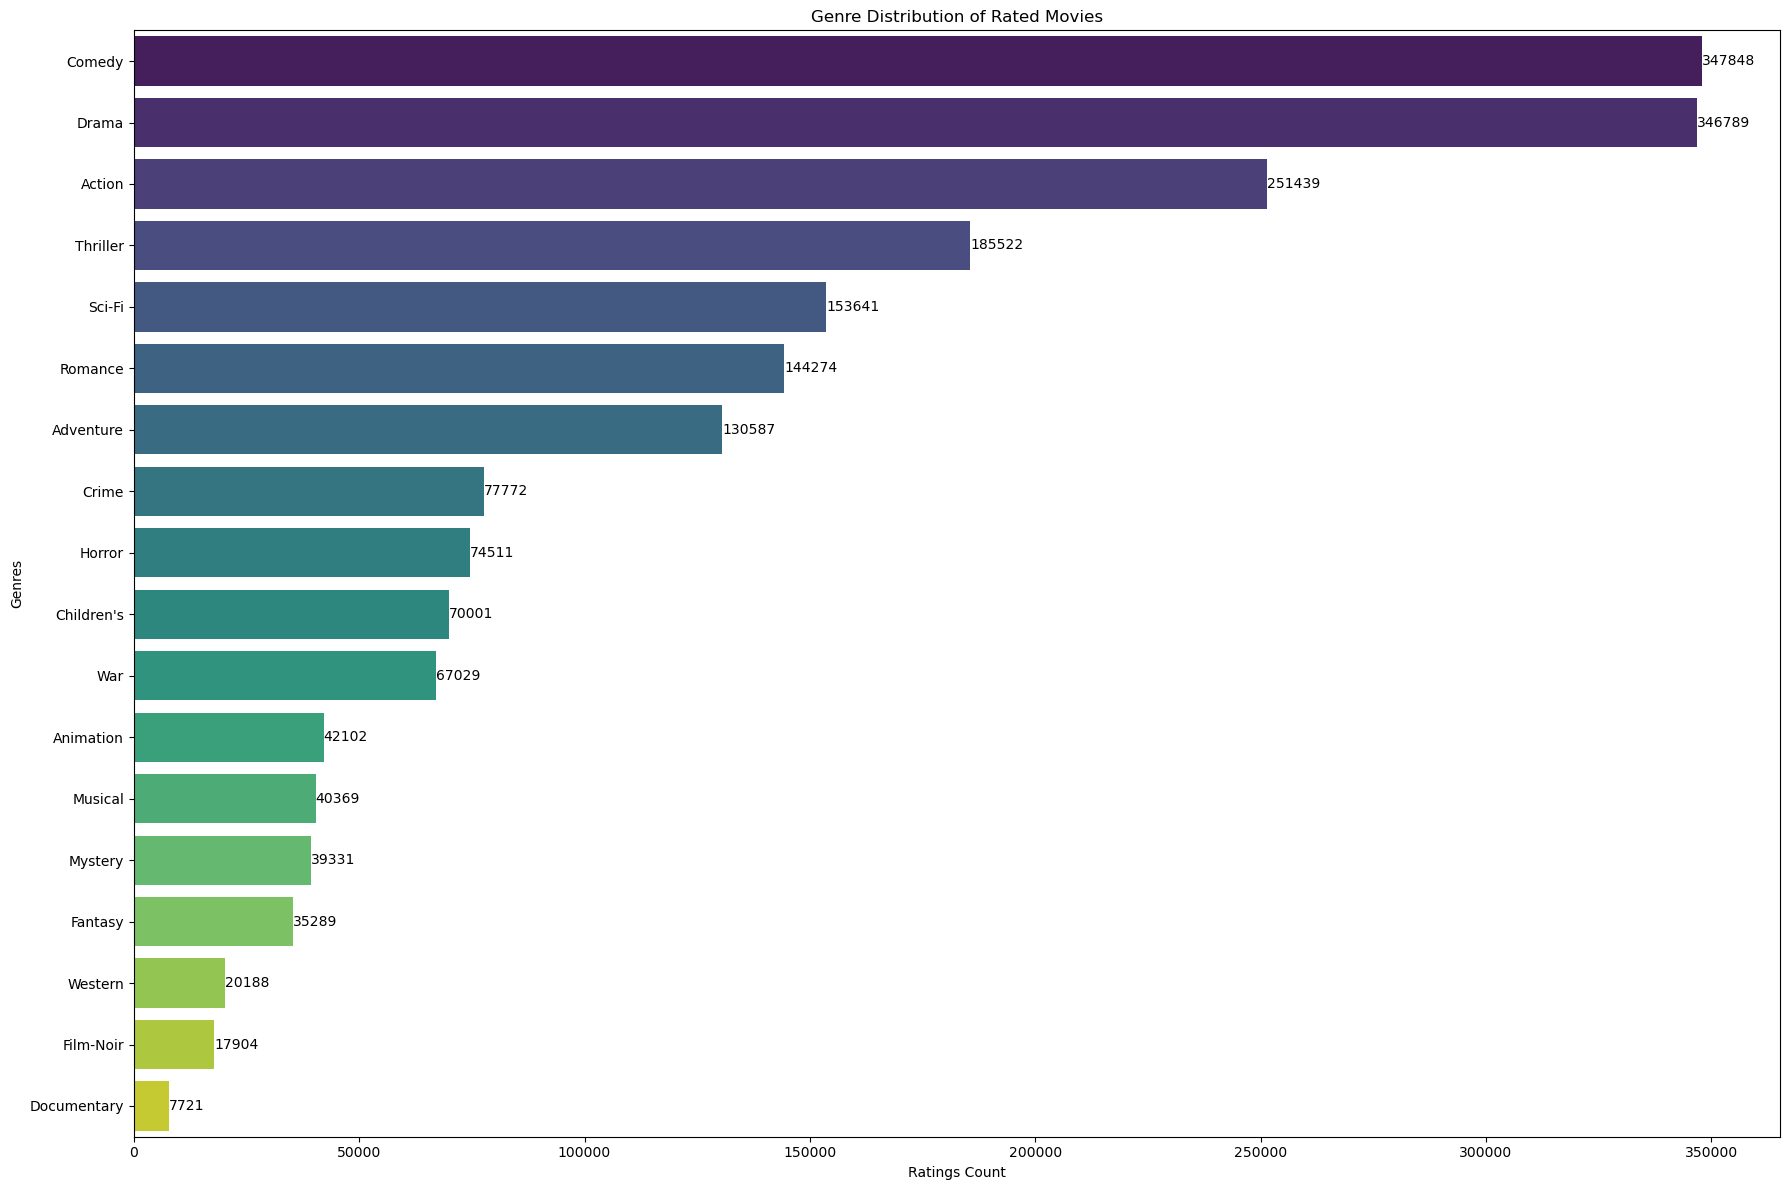

In [56]:
plt.figure(figsize = (18, 12))
bars = sns.barplot(x = genre_counts_df['ratings_count'], y = genre_counts_df['genres'], palette = 'viridis')

for bar in bars.patches:
    width = bar.get_width()
    bars.text(width, bar.get_y() + bar.get_height()/2, str(int(width)), ha = 'left', va = 'center')
    
# Setting title and labels
plt.title('Genre Distribution of Rated Movies')
plt.xlabel('Ratings Count')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()

In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


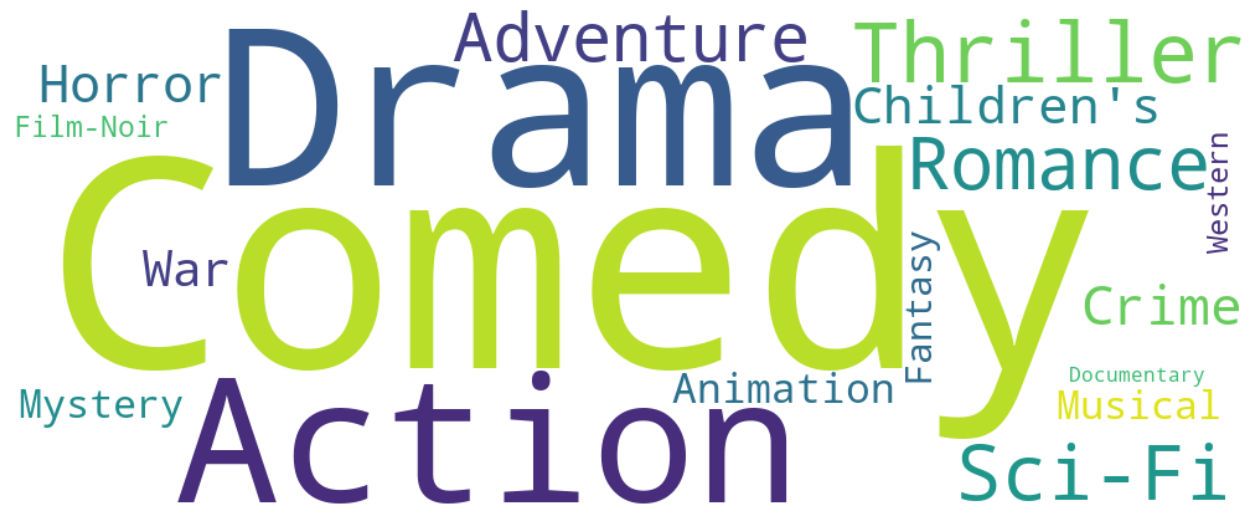

In [58]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Defining a dictionary for the genre wordcloud
genres = keyword_count

# Creating the wordcloud
genre_wordcloud = WordCloud(width = 1000, height = 400, background_color = 'white')
genre_wordcloud.generate_from_frequencies(genres)

# Plotting the wordcloud
plt.figure(figsize = (16, 8))
plt.imshow(genre_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [59]:
# Rated movies per age group
age_rated_movie_count = movie_ratings_updated.groupby('age')['movieID'].count().reset_index()
age_rated_movie_count.rename(columns = {'movieID': 'rated_movie_count'}, inplace = True)
age_rated_movie_count

,age,rated_movie_count
0,18-24,179546
1,25-34,388139
2,35-44,193789
3,45-49,81070
4,50-55,70446
5,56+,37370
6,Under 18,26276


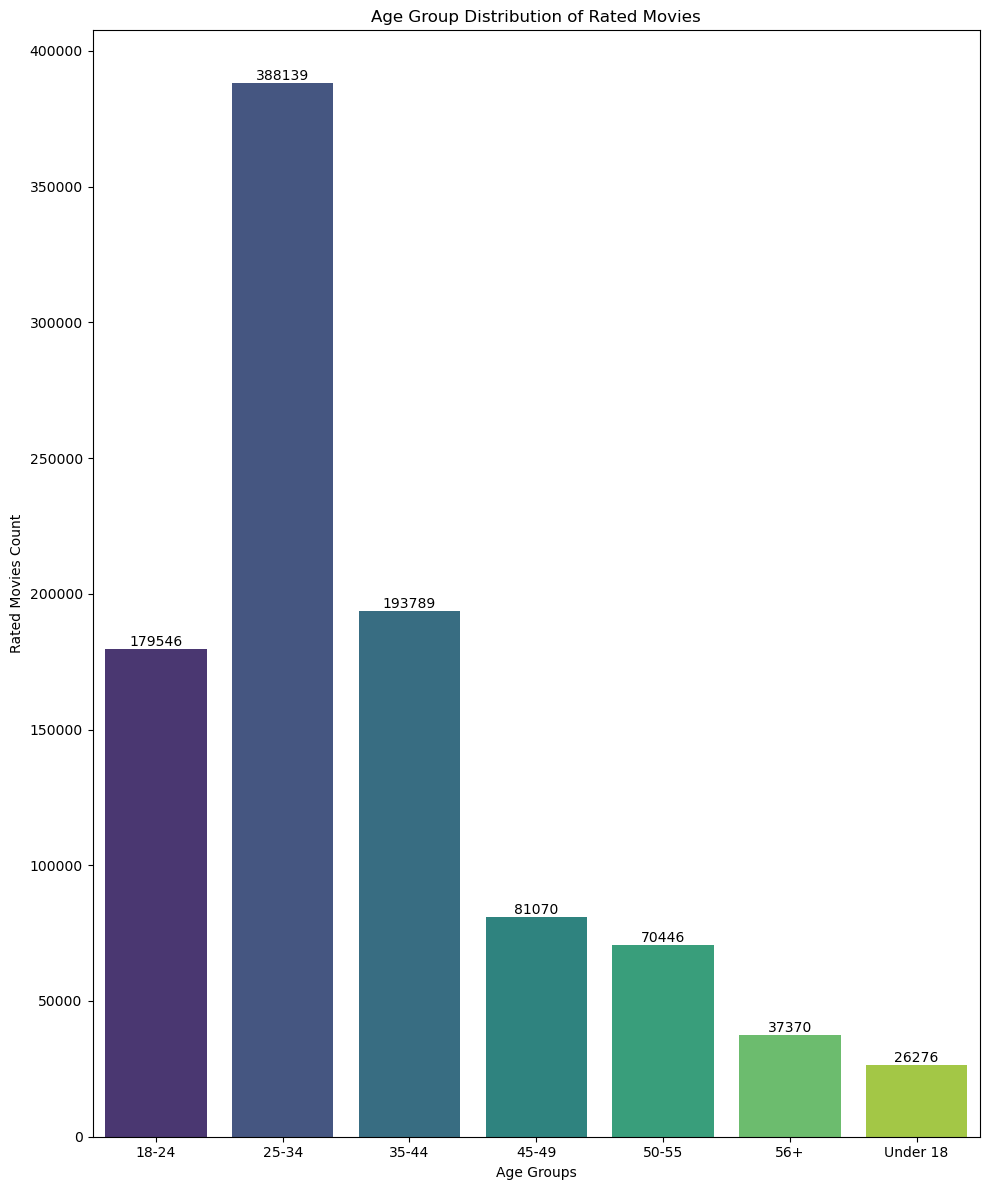

In [60]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = age_rated_movie_count['age'], y = age_rated_movie_count['rated_movie_count'], palette = 'viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom')


# Setting title and labels
plt.title('Age Group Distribution of Rated Movies')
plt.xlabel('Age Groups')
plt.ylabel('Rated Movies Count')

plt.tight_layout()
plt.show()

In [61]:
# Rated movies per occupation
occupation_rated_movie_count = movie_ratings_updated.groupby('occupation')['movieID'].count().reset_index()
occupation_rated_movie_count.rename(columns = {'movieID': 'rated_movie_count'}, inplace = True)
occupation_rated_movie_count

,occupation,rated_movie_count
0,Admin,31349
1,Artist,48783
2,College/Grad student,129429
3,Customer service rep,20504
4,Educator,83407
5,Farmer,1696
6,Healthcare worker,35867
7,Homemaker,11345
8,K-12 student,22352
9,Lawyer,20563


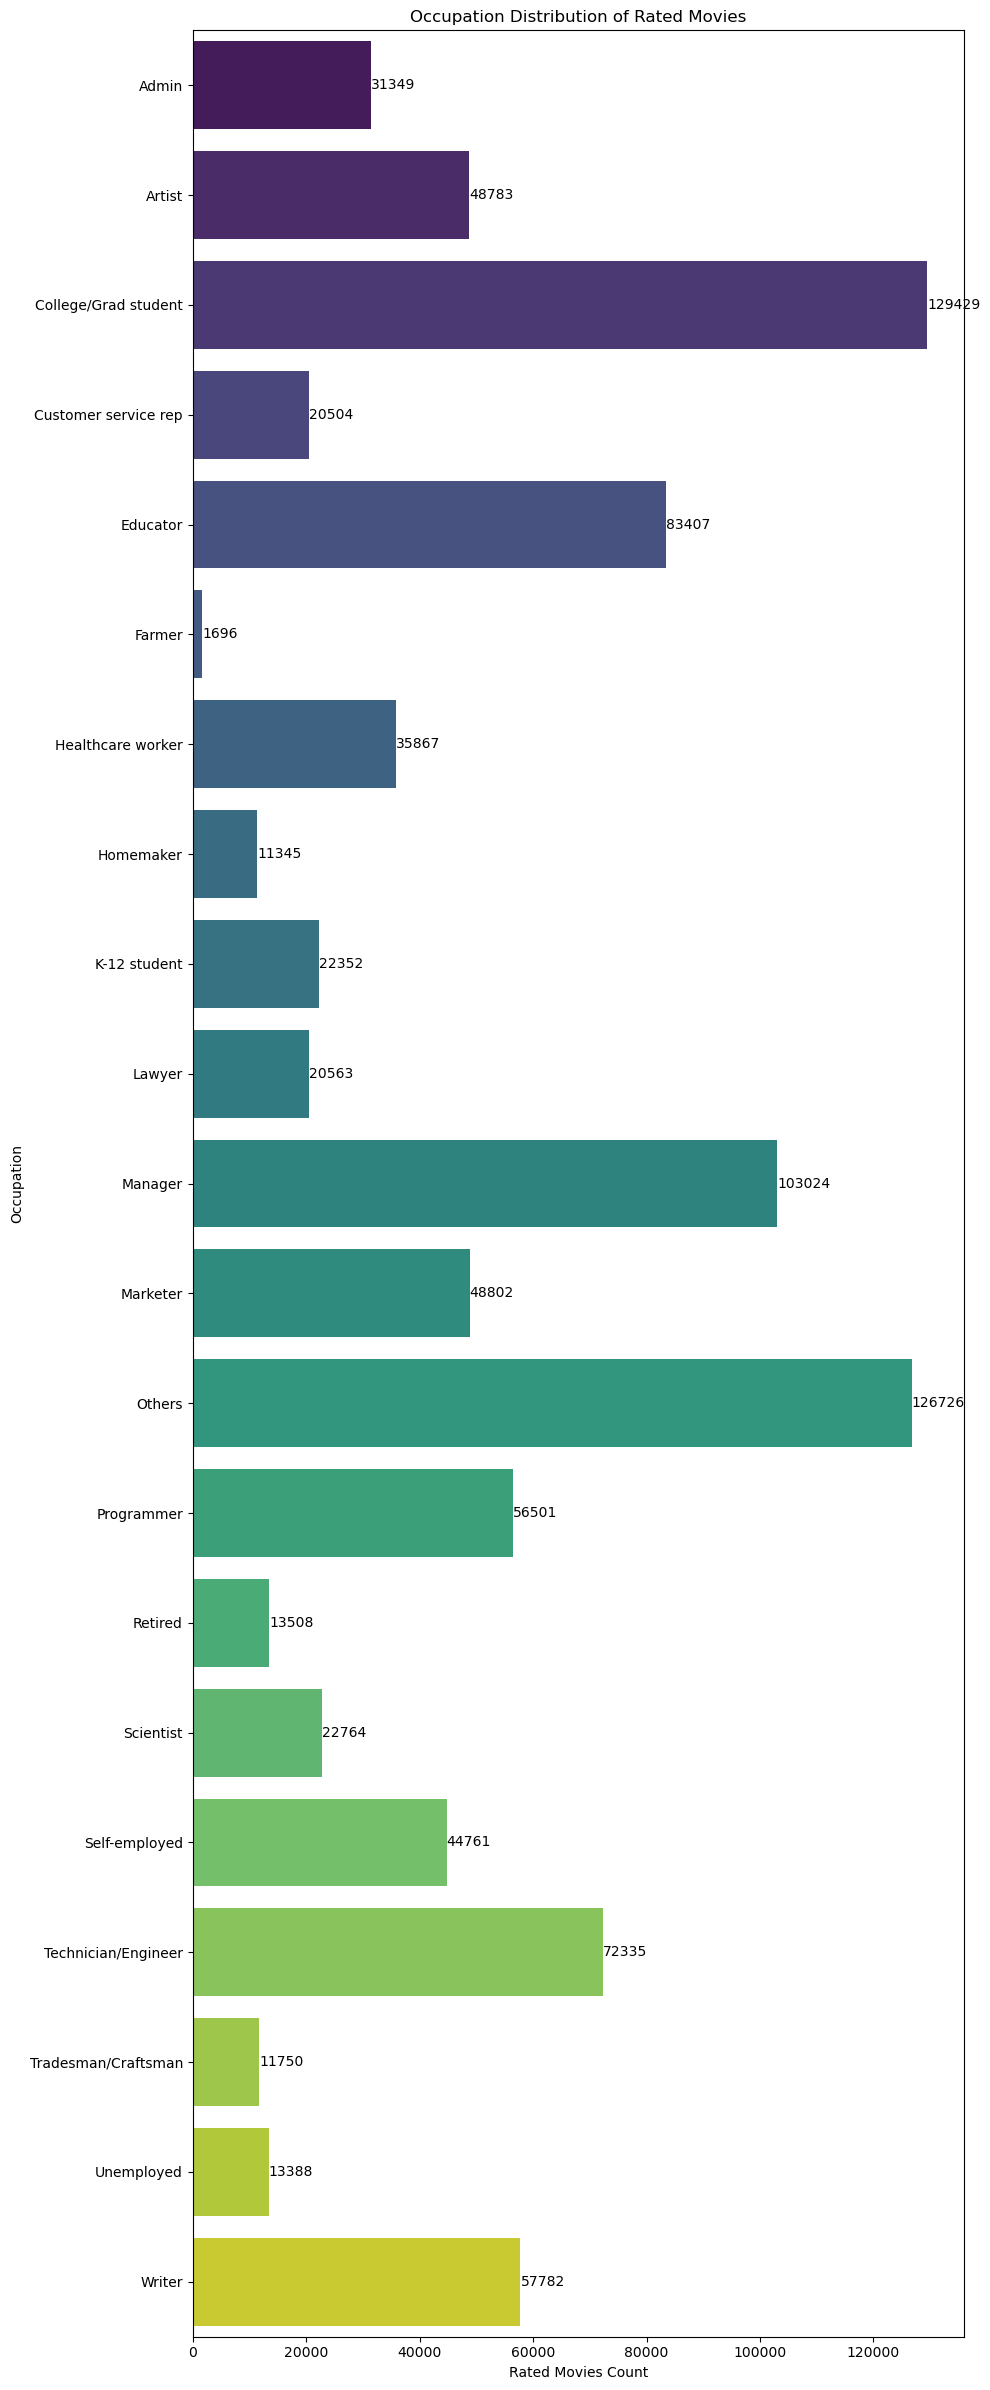

In [62]:
plt.figure(figsize = (10, 24))
bars = sns.barplot(x = occupation_rated_movie_count['rated_movie_count'], y = occupation_rated_movie_count['occupation'], palette = 'viridis')

for bar in bars.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, str(int(width)), ha = 'left', va = 'center')

# Setting title and labels
plt.title('Occupation Distribution of Rated Movies')
plt.xlabel('Rated Movies Count')
plt.ylabel('Occupation')

plt.tight_layout()
plt.show()

In [63]:
# Rated movies per state
state_rated_movie_count = movie_ratings_updated.groupby('state')['movieID'].count().reset_index()
state_rated_movie_count.rename(columns = {'movieID': 'rated_movie_count'}, inplace = True)
state_rated_movie_count

,state,rated_movie_count
0,AE,607
1,AK,911
2,AL,3500
3,AP,213
4,AR,4496
5,AZ,15086
6,CA,180436
7,CO,18428
8,CT,15381
9,DC,5195


In [64]:
# Top 20 states with the most rated movies count
top_20_states_rated_movies = state_rated_movie_count.nlargest(20, 'rated_movie_count')
top_20_states_rated_movies

,state,rated_movie_count
6,CA,180436
37,NY,69746
26,MN,63819
47,TX,51982
17,IL,51682
22,MA,44661
38,OH,39814
25,MI,37364
51,WA,37225
11,FL,28765


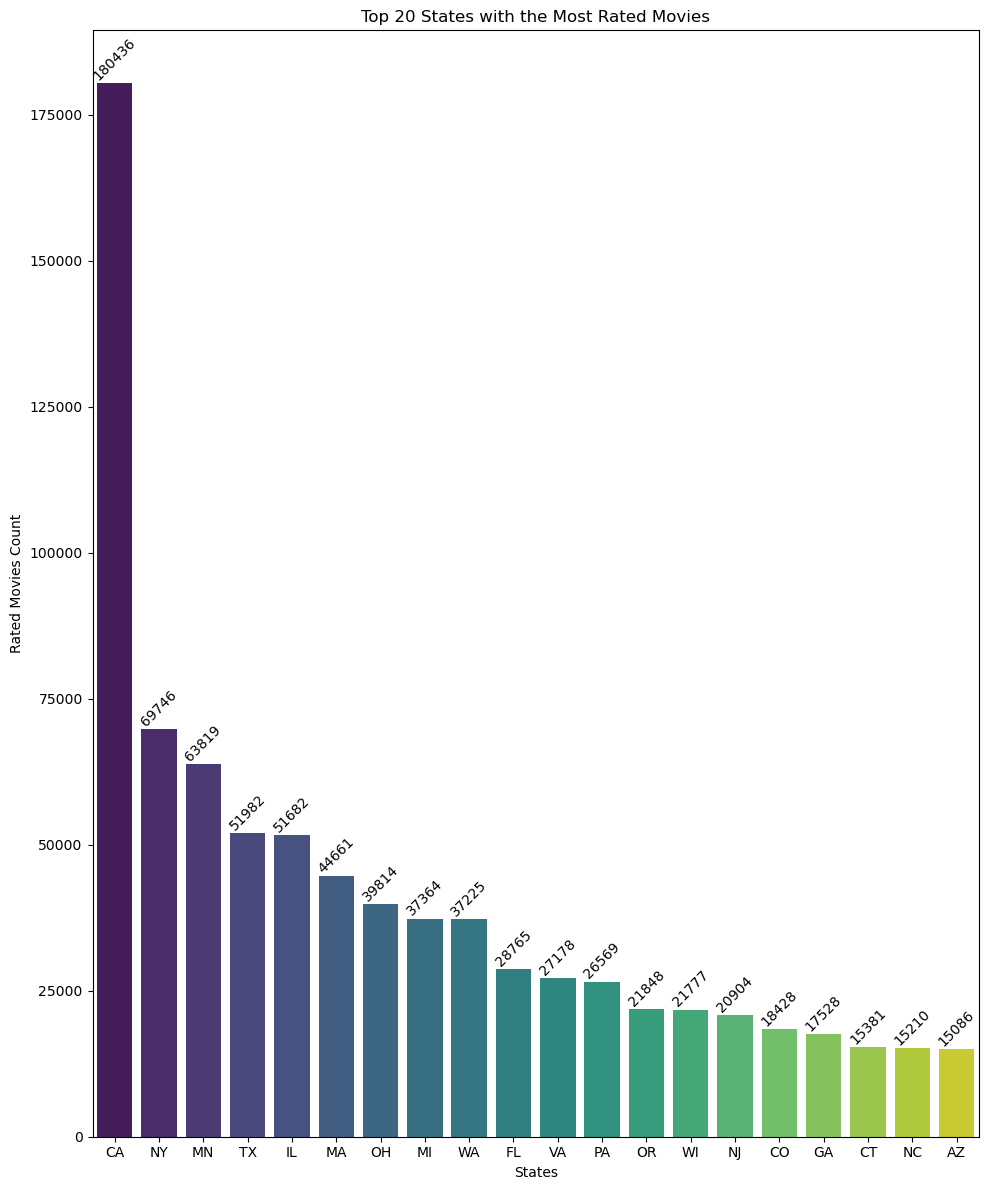

In [65]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = top_20_states_rated_movies['state'], y = top_20_states_rated_movies['rated_movie_count'], palette = 'viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom', rotation = 45)


# Setting title and labels
plt.title('Top 20 States with the Most Rated Movies')
plt.xlabel('States')
plt.ylabel('Rated Movies Count')

plt.tight_layout()
plt.show()

In [66]:
# Bottom 20 states with the least rated movies count
bottom_20_states_rated_movies = state_rated_movie_count.nsmallest(20, 'rated_movie_count')
bottom_20_states_rated_movies

,state,rated_movie_count
3,AP,213
28,MS,557
0,AE,607
13,GU,684
42,PR,754
1,AK,911
31,ND,1025
54,WY,1151
45,SD,1935
29,MT,2300


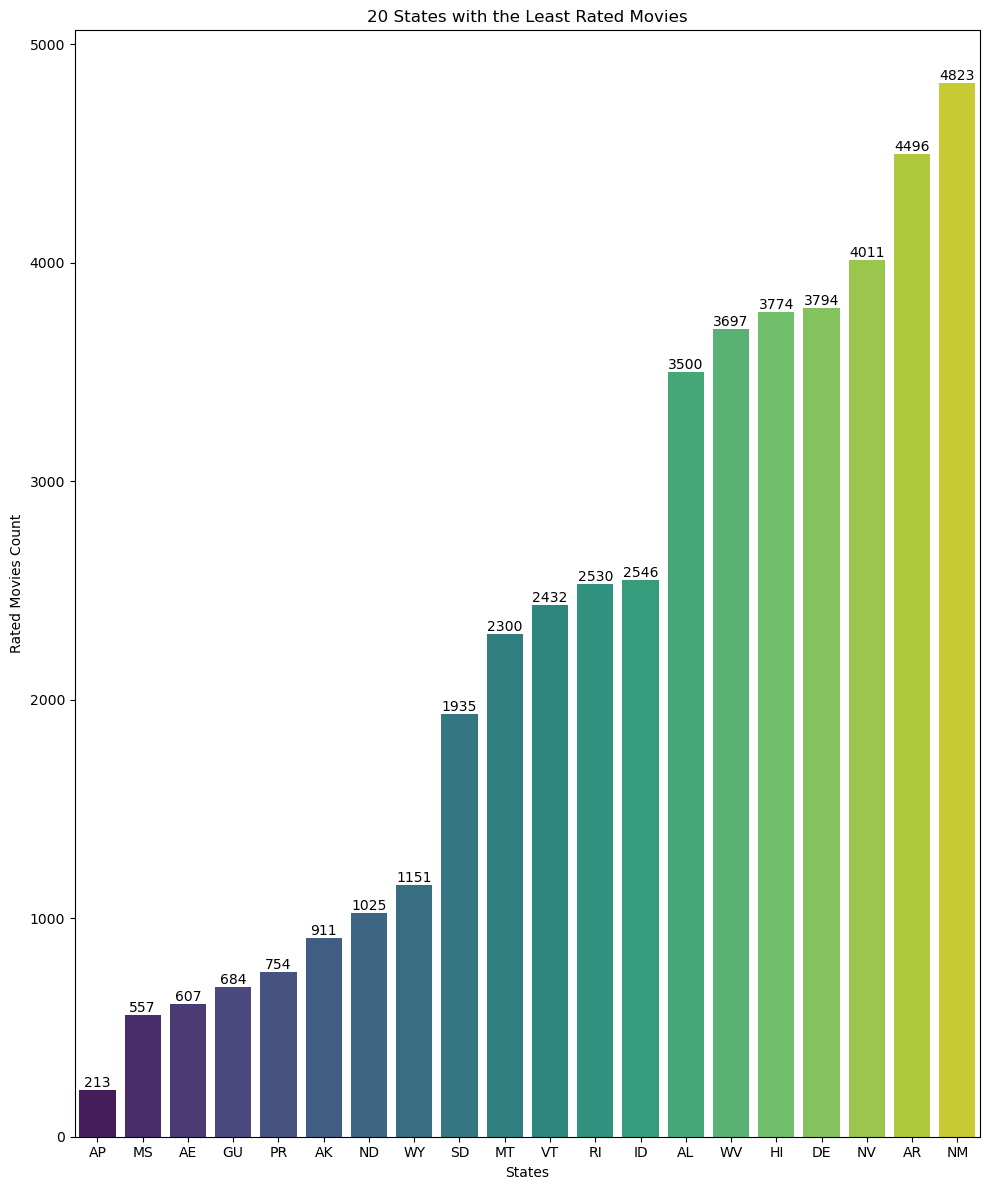

In [67]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = bottom_20_states_rated_movies['state'], y = bottom_20_states_rated_movies['rated_movie_count'], palette = 'viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom')


# Setting title and labels
plt.title('20 States with the Least Rated Movies')
plt.xlabel('States')
plt.ylabel('Rated Movies Count')

plt.tight_layout()
plt.show()

In [68]:
# Average ratings of movies
avg_ratings = movie_ratings_updated.groupby('title')['rating'].mean().reset_index()
avg_ratings.rename(columns = {'rating': 'average_rating'}, inplace=True)
avg_ratings

,title,average_rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.347826
2,'Til There Was You (1997),2.705882
3,"'burbs, The (1989)",2.915541
4,...And Justice for All (1979),3.715789
...,...,...
3698,"Zed & Two Noughts, A (1985)",3.413793
3699,Zero Effect (1998),3.759322
3700,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3701,Zeus and Roxanne (1997),2.619048


In [69]:
# Top 20 movies with the highest average rating
top_20_avg_ratings = avg_ratings.nlargest(20, 'average_rating')
top_20_avg_ratings

,title,average_rating
249,"Baby, The (1973)",5.000000
407,Bittersweet Motel (2000),5.000000
1201,Follow the Bitch (1998),5.000000
1295,"Gate of Heavenly Peace, The (1995)",5.000000
1620,I Am Cuba (Soy Cuba/Ya Kuba) (1964),5.000000
2022,Lured (1947),5.000000
2053,Mamma Roma (1962),5.000000
2450,One Little Indian (1973),5.000000
2900,Schlafes Bruder (Brother of Sleep) (1995),5.000000
3041,Smashing Time (1967),5.000000


In [70]:
# Number of movies with average rating of 5.0
avg_rating_5 = avg_ratings[avg_ratings['average_rating'] == 5.0].shape[0]
avg_rating_5

12

In [71]:
# Bottom 20 movies with the lowest average rating
bottom_20_avg_ratings = avg_ratings.nsmallest(20, 'average_rating')
bottom_20_avg_ratings

,title,average_rating
439,"Blood Spattered Bride, The (La Novia Ensangren...",1.0
930,Diebinnen (1995),1.0
1031,Elstree Calling (1930),1.0
1061,Even Dwarfs Started Small (Auch Zwerge haben k...,1.0
1111,"Fantastic Night, The (La Nuit Fantastique) (1949)",1.0
1311,Get Over It (1996),1.0
1544,Hillbillys in a Haunted House (1967),1.0
1804,Kestrel's Eye (Falkens öga) (1998),1.0
1943,"Little Indian, Big City (Un indien dans la vil...",1.0
2016,"Loves of Carmen, The (1948)",1.0


In [72]:
# Number of movies with average rating of 1
avg_rating_1 = avg_ratings[avg_ratings['average_rating'] == 1.0].shape[0]
avg_rating_1

28

In [73]:
# Number of ratings per movie
ratings_count = movie_ratings_updated.groupby('title')['rating'].count().reset_index()
ratings_count.rename(columns = {'rating': 'ratings_count'}, inplace=True)
ratings_count

,title,ratings_count
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),69
2,'Til There Was You (1997),51
3,"'burbs, The (1989)",296
4,...And Justice for All (1979),190
...,...,...
3698,"Zed & Two Noughts, A (1985)",29
3699,Zero Effect (1998),295
3700,Zero Kelvin (Kjærlighetens kjøtere) (1995),2
3701,Zeus and Roxanne (1997),21


In [74]:
# Top 20 movies with the most ratings count
top_20_most_rated = ratings_count.nlargest(20, 'ratings_count')
top_20_most_rated

,title,ratings_count
127,American Beauty (1999),3354
3151,Star Wars: Episode V - The Empire Strikes Back...,2927
3150,Star Wars: Episode IV - A New Hope (1977),2925
3152,Star Wars: Episode VI - Return of the Jedi (1983),2823
1787,Jurassic Park (1993),2603
3290,Terminator 2: Judgment Day (1991),2603
2891,Saving Private Ryan (1998),2601
2109,"Matrix, The (1999)",2535
258,Back to the Future (1985),2526
2987,"Silence of the Lambs, The (1991)",2524


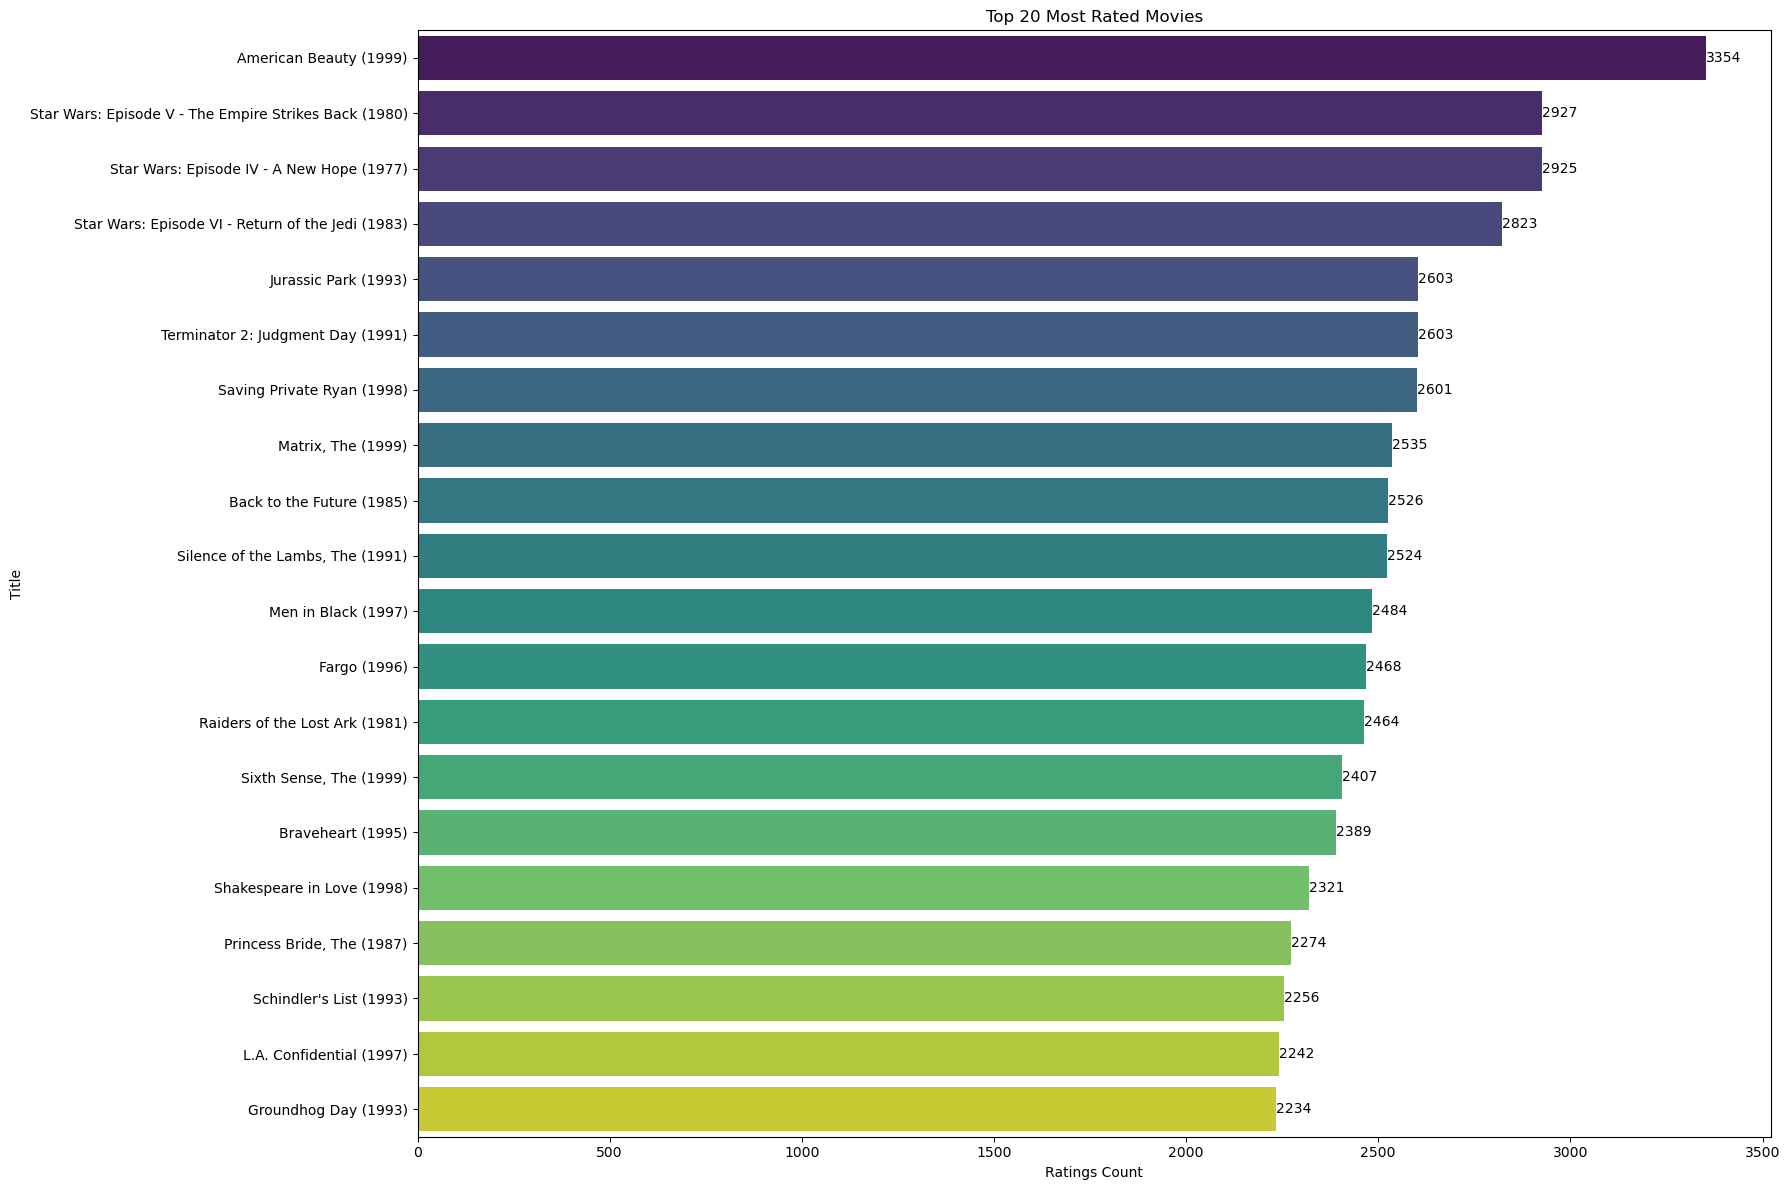

In [75]:
plt.figure(figsize = (18, 12))
bars = sns.barplot(x = top_20_most_rated['ratings_count'], y = top_20_most_rated['title'], palette = 'viridis')

for bar in bars.patches:
    width = bar.get_width()
    bars.text(width, bar.get_y() + bar.get_height()/2, str(int(width)), ha = 'left', va = 'center')

# Setting title and labels
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Ratings Count')
plt.ylabel('Title')

plt.tight_layout()
plt.show()

In [76]:
# 20 least rated movies
least_rated_movies = ratings_count.nsmallest(20, 'ratings_count')
least_rated_movies

,title,ratings_count
76,Aiqing wansui (1994),1
117,"Alley Cats, The (1968)",1
156,An Unforgettable Summer (1994),1
179,Anna (1996),1
185,Another Man's Poison (1952),1
249,"Baby, The (1973)",1
256,Back Stage (2000),1
298,"Bat Whispers, The (1930)",1
323,Beauty (1998),1
345,Beloved/Friend (Amigo/Amado) (1999),1


In [77]:
# Number of movies that were rated just once
movies_rated_once = ratings_count[ratings_count['ratings_count'] == 1].shape[0]
movies_rated_once

115

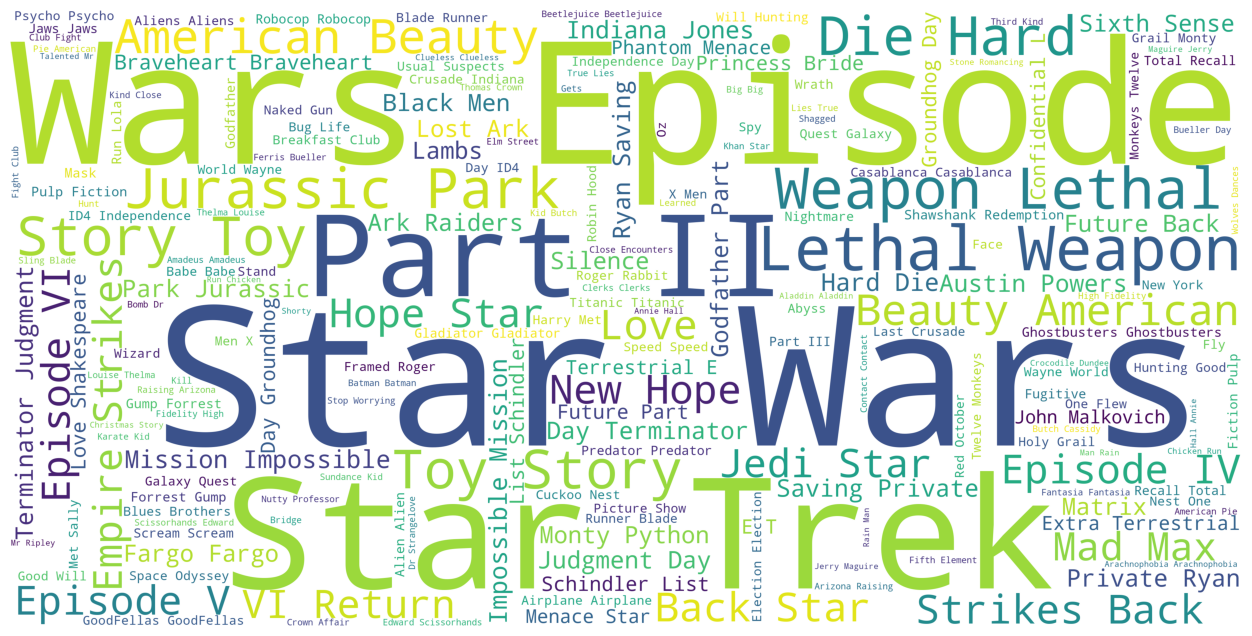

In [78]:
# Creating a wordcloud of the movie titles
movie_ratings_updated['title'] = movie_ratings_updated['title'].fillna("").astype('str')
title_corpus = ' '.join(movie_ratings_updated['title'])
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(title_corpus)

# Plotting the wordcloud
plt.figure(figsize = (16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### User-focused EDA

In [79]:
# Number of ratings per user
user_ratings_count = movie_ratings_updated.groupby('userID')['rating'].count().reset_index()
user_ratings_count.rename(columns = {'rating': 'ratings_count'}, inplace = True)
user_ratings_count

,userID,ratings_count
0,1,53
1,2,129
2,3,51
3,4,21
4,5,198
...,...,...
5901,6036,888
5902,6037,202
5903,6038,20
5904,6039,123


In [80]:
# 20 most active users based on ratings count
top_20_users = user_ratings_count.nlargest(20, 'ratings_count')
top_20_users

,userID,ratings_count
4075,4169,2314
1642,1680,1850
4182,4277,1743
1898,1941,1595
1157,1181,1521
874,889,1518
3536,3618,1344
2019,2063,1323
1126,1150,1302
996,1015,1286


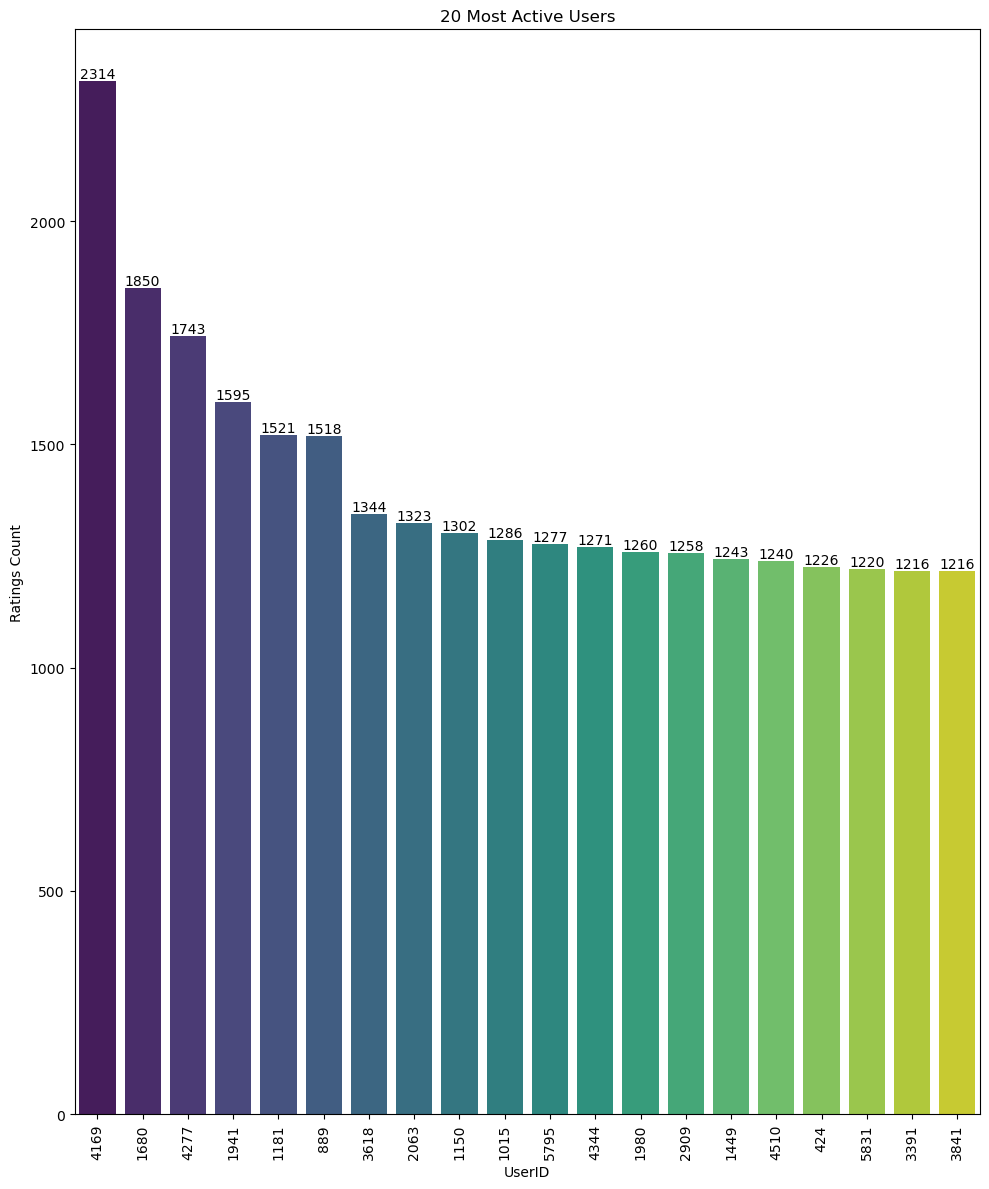

In [81]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = top_20_users['userID'].astype(str), y = top_20_users['ratings_count'], palette = 'viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom')

# Setting title and labels
plt.title('20 Most Active Users')
plt.xlabel('UserID')
plt.ylabel('Ratings Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [82]:
# 20 least active users based on ratings count
least_freq_users = user_ratings_count.nsmallest(20, 'ratings_count')
least_freq_users

,userID,ratings_count
97,98,20
158,160,20
214,217,20
245,250,20
305,311,20
334,341,20
414,421,20
560,572,20
652,665,20
690,703,20


In [83]:
# Number of users that rated just 20 movies
users_20_ratings = ratings_count[ratings_count['ratings_count'] == 20].shape[0]
users_20_ratings

29

In [84]:
# Users per gender
gender_users_count = movie_ratings_updated.groupby('gender')['userID'].nunique().reset_index()
gender_users_count.rename(columns = {'userID': 'gender_count'}, inplace = True)
gender_users_count

,gender,gender_count
0,Female,1682
1,Male,4224


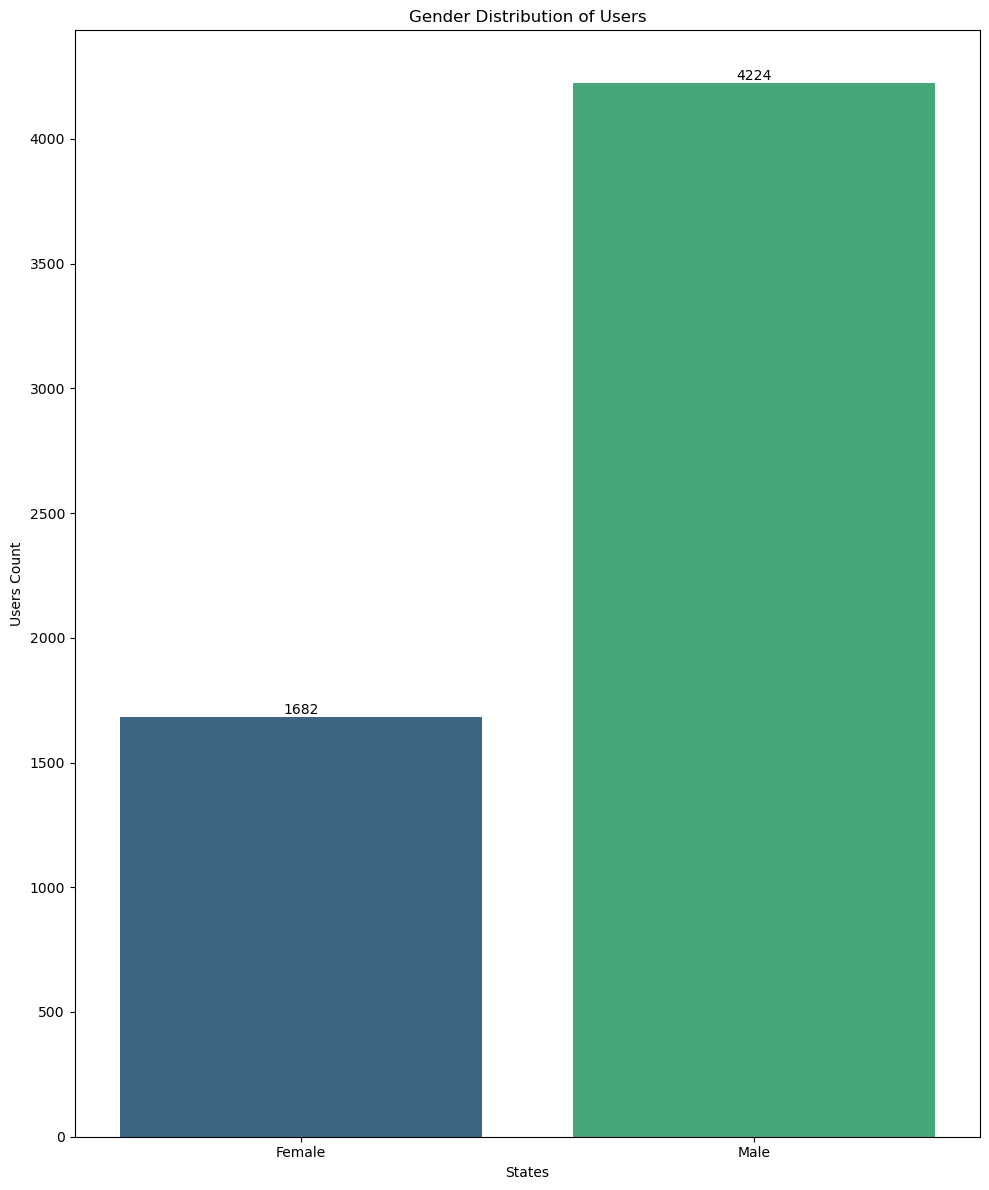

In [85]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = gender_users_count['gender'], y = gender_users_count['gender_count'], palette='viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom')

# Setting title and labels
plt.title('Gender Distribution of Users')
plt.xlabel('States')
plt.ylabel('Users Count')

plt.tight_layout()
plt.show()

In [86]:
# Users per state
state_users_count = movie_ratings_updated.groupby('state')['userID'].nunique().reset_index()
state_users_count.rename(columns = {'userID': 'state_count'}, inplace = True)
state_users_count

,state,state_count
0,AE,4
1,AK,9
2,AL,23
3,AP,3
4,AR,28
5,AZ,83
6,CA,1091
7,CO,100
8,CT,79
9,DC,31


In [87]:
# Top 20 states with the most users
top_20_states = state_users_count.nlargest(20, 'state_count')
top_20_states

,state,state_count
6,CA,1091
37,NY,458
26,MN,429
47,TX,309
22,MA,294
17,IL,284
25,MI,250
38,OH,219
51,WA,196
41,PA,174


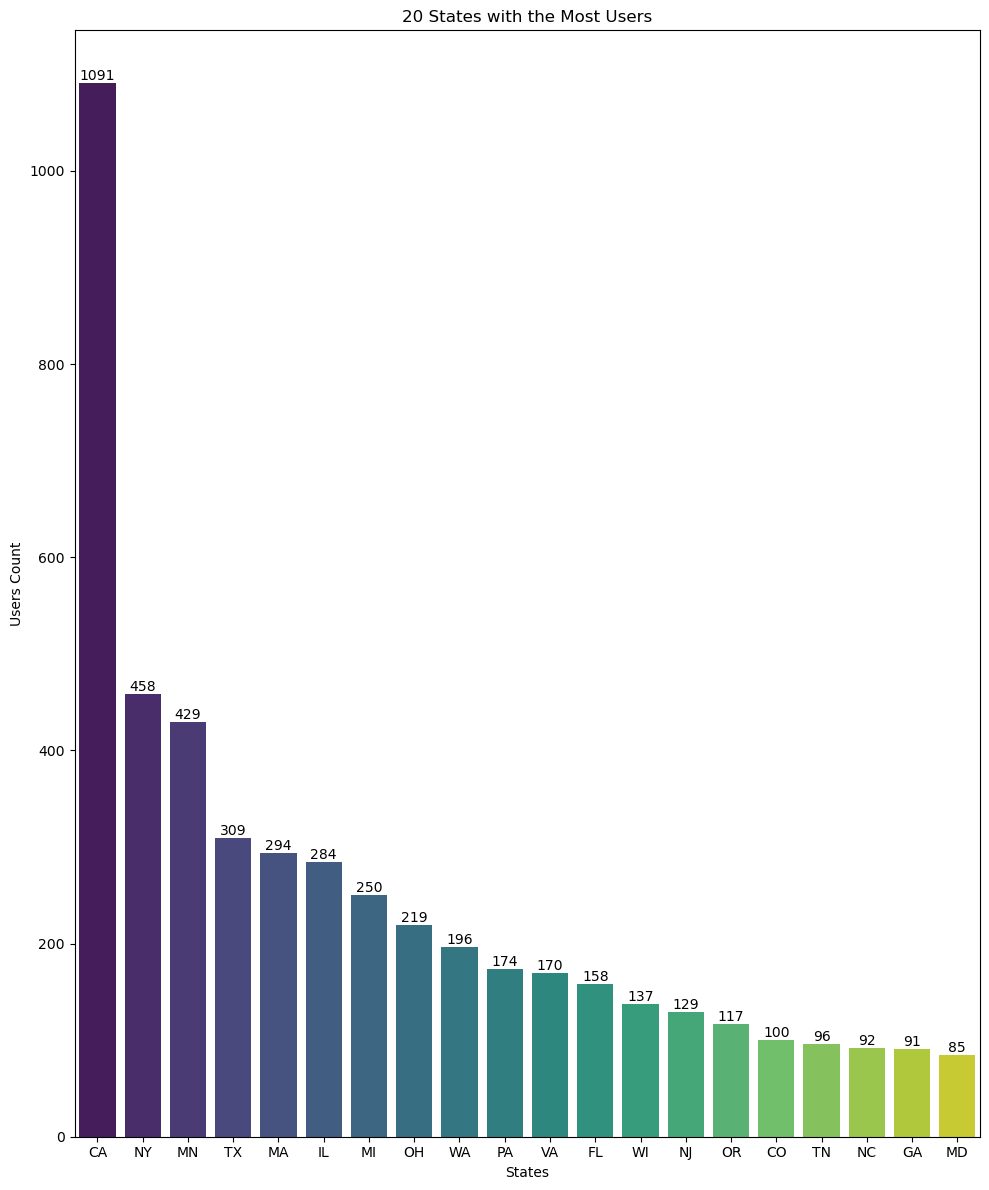

In [88]:
plt.figure(figsize=(10, 12))
bars = sns.barplot(x=top_20_states['state'], y=top_20_states['state_count'], palette='viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

# Setting title and labels
plt.title('20 States with the Most Users')
plt.xlabel('States')
plt.ylabel('Users Count')

plt.tight_layout()
plt.show()

In [89]:
# 20 states with the least number of users
bottom_20_states = state_users_count.nsmallest(20, 'state_count')
bottom_20_states

,state,state_count
13,GU,1
3,AP,3
0,AE,4
42,PR,6
54,WY,7
31,ND,8
1,AK,9
28,MS,9
45,SD,10
29,MT,12


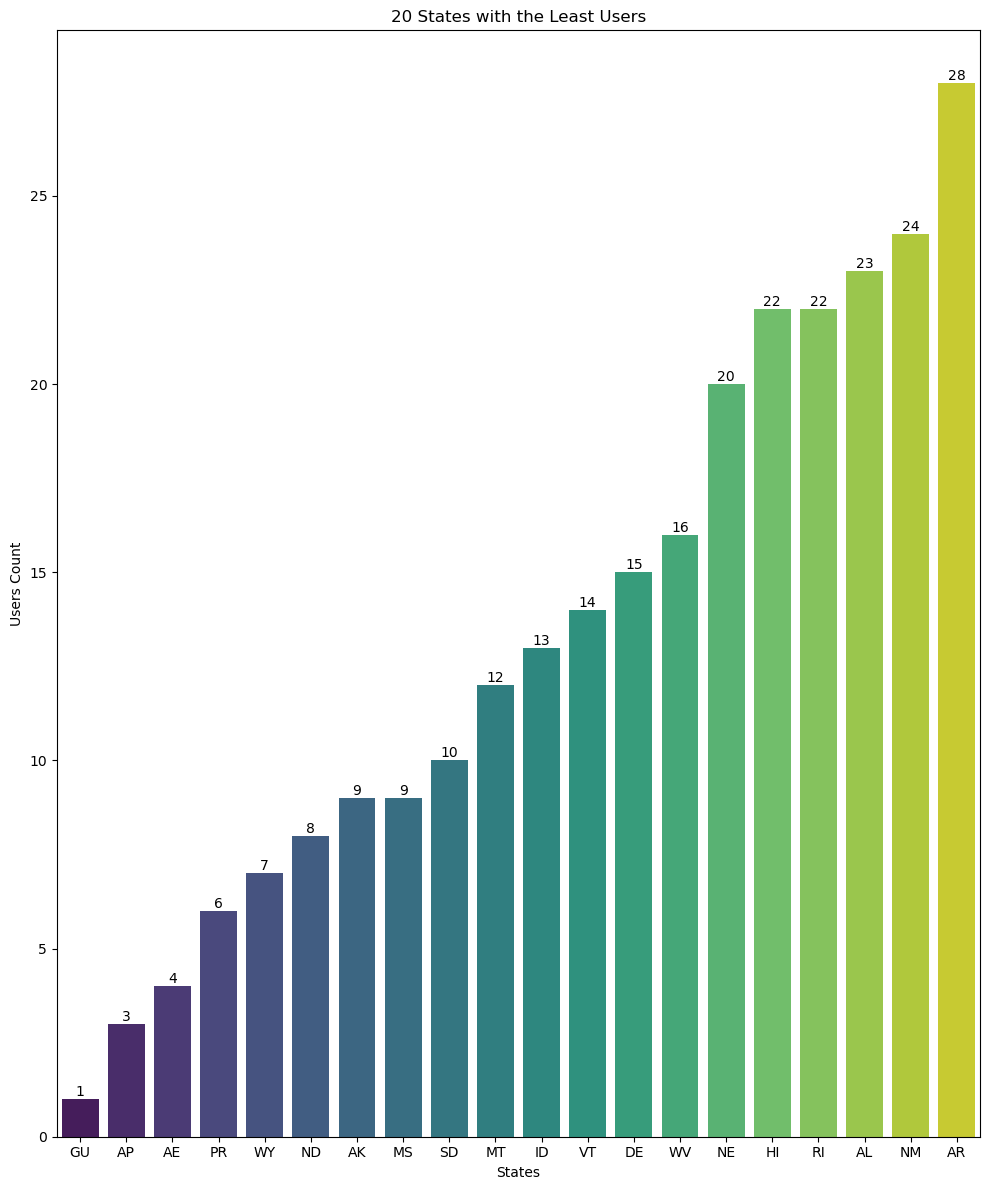

In [90]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = bottom_20_states['state'], y = bottom_20_states['state_count'], palette = 'viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom')


# Setting title and labels
plt.title('20 States with the Least Users')
plt.xlabel('States')
plt.ylabel('Users Count')

plt.tight_layout()
plt.show()

In [91]:
# Users per occupation
occupation_users_count = movie_ratings_updated.groupby('occupation')['userID'].nunique().reset_index()
occupation_users_count.rename(columns = {'userID': 'occupation_count'}, inplace = True)
occupation_users_count

,occupation,occupation_count
0,Admin,170
1,Artist,262
2,College/Grad student,742
3,Customer service rep,109
4,Educator,513
5,Farmer,15
6,Healthcare worker,231
7,Homemaker,92
8,K-12 student,188
9,Lawyer,129


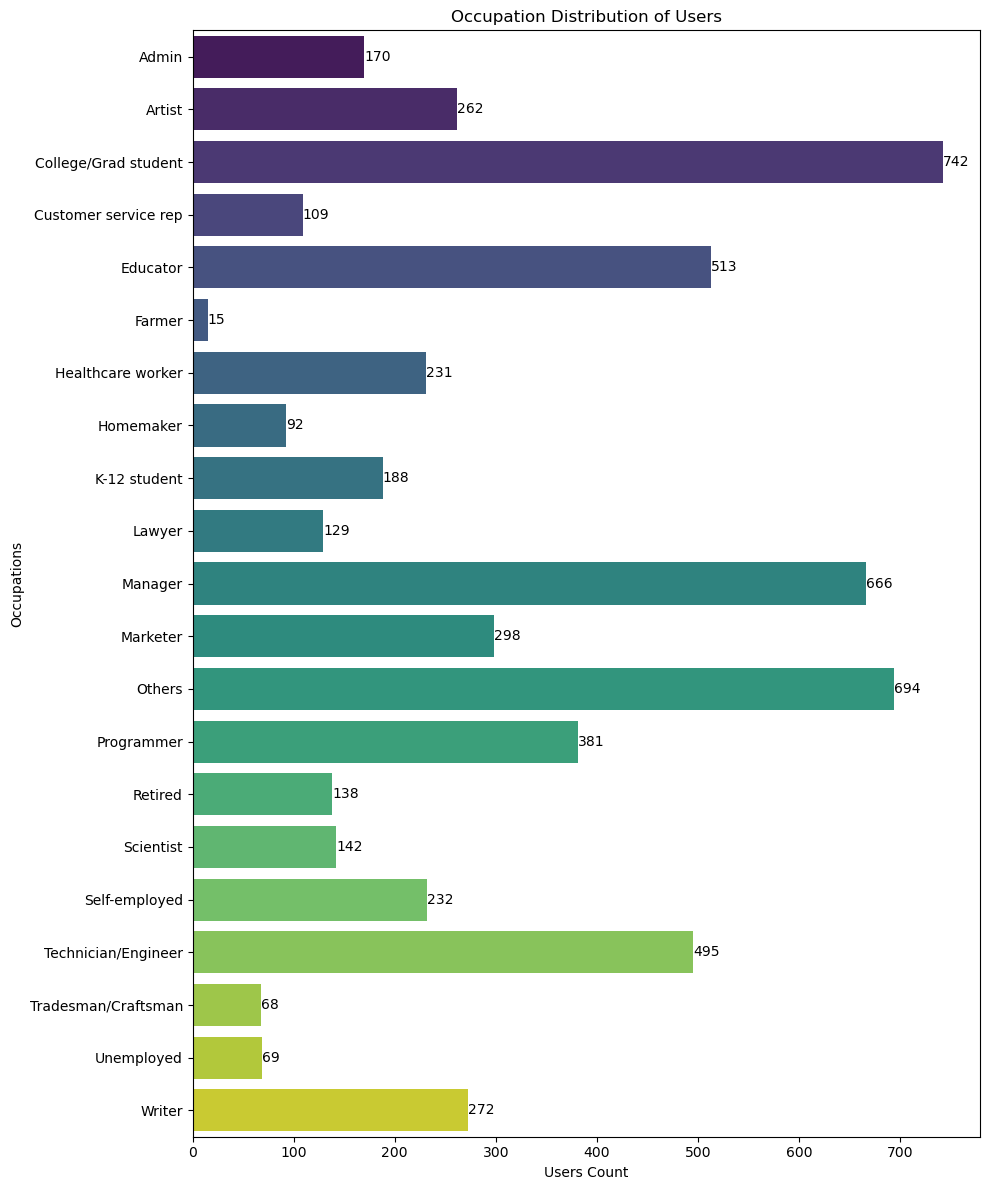

In [92]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = occupation_users_count['occupation_count'], y = occupation_users_count['occupation'], palette='viridis')

for bar in bars.patches:
    width = bar.get_width()
    bars.text(width, bar.get_y() + bar.get_height()/2, str(int(width)), ha = 'left', va = 'center')

# Setting title and labels
plt.title('Occupation Distribution of Users')
plt.xlabel('Users Count')
plt.ylabel('Occupations')

plt.tight_layout()
plt.show()

In [93]:
# Users per age group
age_users_count = movie_ratings_updated.groupby('age')['userID'].nunique().reset_index()
age_users_count.rename(columns = {'userID': 'agegroup_count'}, inplace = True)
age_users_count

,age,agegroup_count
0,18-24,1076
1,25-34,2056
2,35-44,1174
3,45-49,537
4,50-55,483
5,56+,367
6,Under 18,213


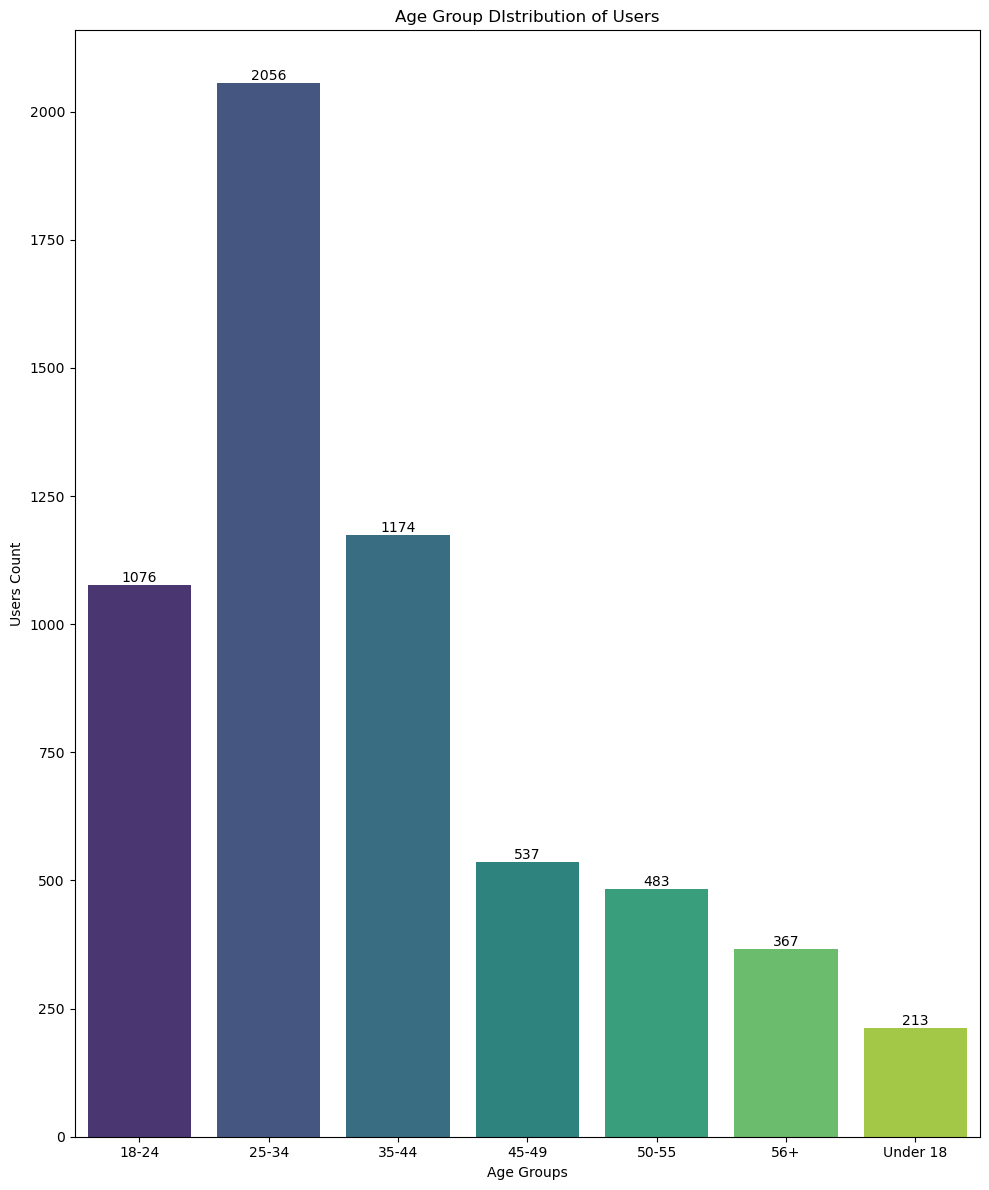

In [94]:
plt.figure(figsize = (10, 12))
bars = sns.barplot(x = age_users_count['age'], y = age_users_count['agegroup_count'], palette = 'viridis')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha = 'center', va = 'bottom')


# Setting title and labels
plt.title('Age Group DIstribution of Users')
plt.xlabel('Age Groups')
plt.ylabel('Users Count')

plt.tight_layout()
plt.show()

### Building Recommender Systems

#### Preprocessing

In [95]:
# Importing required libraries

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [96]:
# Splitting data into training and testing sets
train_data, test_data = train_test_split(movie_ratings_updated, test_size=0.2, random_state=42)

# Training matrix
train_matrix = train_data.pivot_table(index='userID', columns='title', values='rating')
train_matrix.fillna(0, inplace=True)

# Test matrix
test_matrix = test_data.pivot_table(index='userID', columns='title', values='rating')
test_matrix.fillna(0, inplace=True)

In [97]:
# Preprocessing genres into a binary format for similarity computation
movie_genres = movie_ratings_updated[['title', 'genres']].drop_duplicates().set_index('title')
movie_genres['genres'] = movie_genres['genres'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
genres_matrix = mlb.fit_transform(movie_genres['genres'])
genres_df = pd.DataFrame(genres_matrix, index=movie_genres.index, columns=mlb.classes_)

# Computing cosine similarity based on genres
genre_similarity = cosine_similarity(genres_df)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genres.index, columns=movie_genres.index)
genre_similarity_df.head()

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.333333,0.408248,0.408248,0.577350,0.0,0.408248,0.408248,0.0,0.000000,...,0.577350,0.408248,0.666667,0.000000,0.0,0.577350,0.000000,0.000000,0.000000,0.0
Jumanji (1995),0.333333,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
Grumpier Old Men (1995),0.408248,0.000000,1.000000,0.500000,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.707107,0.500000,0.000000,0.000000,0.0,0.707107,0.000000,0.000000,0.000000,0.0
Waiting to Exhale (1995),0.408248,0.000000,0.500000,1.000000,0.707107,0.0,0.500000,0.000000,0.0,0.000000,...,0.707107,1.000000,0.000000,0.408248,0.0,0.707107,0.707107,0.707107,0.707107,0.5
Father of the Bride Part II (1995),0.577350,0.000000,0.707107,0.707107,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,1.000000,0.707107,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0


In [98]:
# Creating user-item matrix with movie titles as columns
user_item_matrix = movie_ratings_updated.pivot_table(index='userID', columns='title', values='rating')
user_item_matrix.fillna(0, inplace=True)

# Computing cosine similarity between items (movie titles)
item_similarity = cosine_similarity(train_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=train_matrix.columns, columns=train_matrix.columns)
item_similarity_df.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.033032,0.019612,0.043364,0.034075,0.000000,0.050052,0.137852,0.140895,0.095989,...,0.051041,0.052475,0.000000,0.015693,0.0,0.026189,0.029228,0.000000,0.100950,0.021192
'Night Mother (1986),0.033032,1.000000,0.080847,0.084078,0.096850,0.000000,0.070983,0.122305,0.090030,0.088195,...,0.051794,0.052386,0.079277,0.095106,0.0,0.076820,0.053140,0.000000,0.000000,0.062926
'Til There Was You (1997),0.019612,0.080847,1.000000,0.068812,0.027325,0.092308,0.125645,0.095731,0.130638,0.060240,...,0.038438,0.069522,0.000000,0.096845,0.0,0.000000,0.080708,0.000000,0.000000,0.058035
"'burbs, The (1989)",0.043364,0.084078,0.068812,1.000000,0.095919,0.000000,0.161729,0.204281,0.162919,0.131514,...,0.072850,0.173371,0.025487,0.093328,0.0,0.039716,0.140795,0.000000,0.024646,0.097960
...And Justice for All (1979),0.034075,0.096850,0.027325,0.095919,1.000000,0.000000,0.052303,0.133614,0.105117,0.163039,...,0.022262,0.126447,0.051924,0.093166,0.0,0.066633,0.084989,0.085671,0.000000,0.063722


In [99]:
# Encoding demographic data
def preprocess_demographics(data):
    user_demographics = data[['userID', 'gender', 'age', 'occupation', 'zipcode']].drop_duplicates().set_index('userID')
    user_demographics = pd.get_dummies(user_demographics, columns=['gender', 'age', 'occupation', 'zipcode'])
    return user_demographics

user_demographics_encoded = preprocess_demographics(movie_ratings_updated)

# Computing cosine similarity based on demographic data
demographic_similarity = cosine_similarity(user_demographics_encoded)
demographic_similarity_df = pd.DataFrame(demographic_similarity, index=user_demographics_encoded.index, columns=user_demographics_encoded.index)
demographic_similarity_df.head()

userID,1,6,8,9,10,18,19,21,23,26,...,159,3542,4419,2697,4061,1270,3235,3298,768,5727
userID,,,,,,,,,,,,,,,,,,,,,
1,1.00,0.25,0.0,0.0,0.25,0.25,0.50,0.00,0.00,0.0,...,0.25,0.0,0.25,0.25,0.00,0.0,0.00,0.50,0.00,0.0
6,0.25,1.00,0.0,0.0,0.25,0.25,0.00,0.00,0.00,0.0,...,0.25,0.0,0.25,0.50,0.25,0.0,0.00,0.00,0.00,0.0
8,0.00,0.00,1.0,0.5,0.00,0.00,0.25,0.25,0.25,0.5,...,0.00,0.5,0.25,0.00,0.25,0.5,0.25,0.25,0.75,0.5
9,0.00,0.00,0.5,1.0,0.00,0.00,0.25,0.25,0.25,0.5,...,0.00,0.5,0.00,0.25,0.25,0.5,0.25,0.25,0.50,0.5
10,0.25,0.25,0.0,0.0,1.00,0.25,0.00,0.00,0.25,0.0,...,0.25,0.0,0.25,0.25,0.00,0.0,0.00,0.00,0.00,0.0


#### Content-based Filtering Recommender System

In [100]:
# Custom function to predict rating based on content-based filtering
def content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix):
    if movie_title not in genre_similarity_df.columns:
        return np.nan
    sim_scores = genre_similarity_df[movie_title]
    user_ratings = train_matrix.loc[user_id]
    user_ratings = user_ratings[user_ratings > 0]
    weighted_sum = np.dot(sim_scores.loc[user_ratings.index], user_ratings)
    sum_of_similarities = sim_scores.loc[user_ratings.index].sum()
    return weighted_sum / sum_of_similarities if sum_of_similarities != 0 else 0

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_content_based = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = content_based_recommend(user, movie, genre_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_content_based.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_content_based]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance  metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
recall = recall_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8218483781127129, Precision: 0.874222131838122, Recall: 0.9196193363445776, F1 Score: 0.896346294762804


#### Item-based Collaborative Recommender System

In [101]:
# Custom function to predict rating based on item-based collaborative filtering
def item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix):
    if movie_title not in item_similarity_df.columns:
        return np.nan
    sim_scores = item_similarity_df[movie_title]
    user_ratings = train_matrix.loc[user_id]
    user_ratings = user_ratings[user_ratings > 0]
    weighted_sum = np.dot(sim_scores.loc[user_ratings.index], user_ratings)
    sum_of_similarities = sim_scores.loc[user_ratings.index].sum()
    return weighted_sum / sum_of_similarities if sum_of_similarities != 0 else 0

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_item_based = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = item_based_recommend(user, movie, item_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_item_based.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_item_based]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
recall = recall_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8395963154310526, Precision: 0.8669444552329485, Recall: 0.9550972505776354, F1 Score: 0.908888378302131


#### Hybrid (Content-based + Item-based Collaborative) Recommender System

In [103]:
# Hybrid similarity combining both content-based and item-based collaborative filtering
cbf_icf_hybrid_similarity_df = (item_similarity_df * 0.5) + (genre_similarity_df.reindex_like(item_similarity_df) * 0.5)

# Custom function to predict rating based on hybrid (content-based + item-based collaborative) filtering
def cbf_icf_hybrid_recommend(user_id, movie_title):
    if movie_title not in cbf_icf_hybrid_similarity_df.columns:
        return np.nan
    sim_scores = cbf_icf_hybrid_similarity_df[movie_title]
    user_ratings = train_matrix.loc[user_id]
    user_ratings = user_ratings[user_ratings > 0]
    weighted_sum = np.dot(sim_scores.loc[user_ratings.index], user_ratings)
    sum_of_similarities = sim_scores.loc[user_ratings.index].sum()
    return weighted_sum / sum_of_similarities if sum_of_similarities != 0 else 0

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_icf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_icf_hybrid_recommend(user, movie)
    if not np.isnan(predicted):
        predicted_ratings_cbf_icf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_icf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8338974198800826, Precision: 0.8708883811419781, Recall: 0.9379943520091932, F1 Score: 0.904704271857209


In [102]:
# Hybrid similarity combining both content-based and item-based collaborative filtering
cbf_icf_hybrid_similarity_df = (item_similarity_df * 0.4) + (genre_similarity_df.reindex_like(item_similarity_df) * 0.6)

# Custom function to predict rating based on hybrid (content-based + item-based collaborative) filtering
def cbf_icf_hybrid_recommend(user_id, movie_title):
    if movie_title not in cbf_icf_hybrid_similarity_df.columns:
        return np.nan
    sim_scores = cbf_icf_hybrid_similarity_df[movie_title]
    user_ratings = train_matrix.loc[user_id]
    user_ratings = user_ratings[user_ratings > 0]
    weighted_sum = np.dot(sim_scores.loc[user_ratings.index], user_ratings)
    sum_of_similarities = sim_scores.loc[user_ratings.index].sum()
    return weighted_sum / sum_of_similarities if sum_of_similarities != 0 else 0

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_icf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_icf_hybrid_recommend(user, movie)
    if not np.isnan(predicted):
        predicted_ratings_cbf_icf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_icf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
recall = recall_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8321001940594263, Precision: 0.8713976638406369, Recall: 0.9379943520091932, F1 Score: 0.9034704252882698


In [104]:
# Hybrid similarity combining both content-based and item-based collaborative filtering
cbf_icf_hybrid_similarity_df = (item_similarity_df * 0.6) + (genre_similarity_df.reindex_like(item_similarity_df) * 0.4)

# Custom function to predict rating based on hybrid (content-based + item-based collaborative) filtering
def cbf_icf_hybrid_recommend(user_id, movie_title):
    if movie_title not in cbf_icf_hybrid_similarity_df.columns:
        return np.nan
    sim_scores = cbf_icf_hybrid_similarity_df[movie_title]
    user_ratings = train_matrix.loc[user_id]
    user_ratings = user_ratings[user_ratings > 0]
    weighted_sum = np.dot(sim_scores.loc[user_ratings.index], user_ratings)
    sum_of_similarities = sim_scores.loc[user_ratings.index].sum()
    return weighted_sum / sum_of_similarities if sum_of_similarities != 0 else 0

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_icf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_icf_hybrid_recommend(user, movie)
    if not np.isnan(predicted):
        predicted_ratings_cbf_icf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_icf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8351058110301535, Precision: 0.8701030927835052, Recall: 0.9379943520091932, F1 Score: 0.9055900184105914


#### Hybrid (Content-based + Demographic-based Collaborative) Recommender System

In [105]:
# Custom function to predict rating based on demographic-based filtering
def demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix):
    sim_scores = demographic_similarity_df[user_id]
    if movie_title not in train_matrix.columns:
        return np.nan
    user_ratings = train_matrix[movie_title]
    weighted_sum = np.dot(sim_scores, user_ratings)
    sum_of_similarities = sim_scores.sum()
    return weighted_sum / sum_of_similarities if sum_of_similarities != 0 else 0

In [106]:
# Custom function to predict rating based on hybrid (content-based + demographic-based) filtering
def cbf_dbf_hybrid_recommend(user_id, movie_title, genre_similarity_df, demographic_similarity_df, train_matrix, content_weight = 0.5, 
                             demographic_weight = 0.5):
    # Getting predictions from both methods
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(content_based_pred) and not np.isnan(demographic_based_pred):
        return (content_based_pred * content_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(content_based_pred):
        return content_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return null
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_dbf_hybrid_recommend(user, movie, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_cbf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.16455398099606816, Precision: 0.9548387096774194, Recall: 0.9379943520091932, F1 Score: 0.005412192059680388


In [107]:
# Custom function to predict rating based on hybrid (content-based + demographic-based) filtering
def cbf_dbf_hybrid_recommend(user_id, movie_title, genre_similarity_df, demographic_similarity_df, train_matrix, content_weight = 0.6, 
                             demographic_weight = 0.4):
    # Getting predictions from both methods
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(content_based_pred) and not np.isnan(demographic_based_pred):
        return (content_based_pred * content_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(content_based_pred):
        return content_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return null
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_dbf_hybrid_recommend(user, movie, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_cbf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.18409035058977719, Precision: 0.9755440879515369, Recall: 0.9379943520091932, F1 Score: 0.05174157771351731


In [108]:
# Custom function to predict rating based on hybrid (content-based + demographic-based) filtering
def cbf_dbf_hybrid_recommend(user_id, movie_title, genre_similarity_df, demographic_similarity_df, train_matrix, content_weight = 0.4, 
                             demographic_weight = 0.6):
    # Getting predictions from both methods
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(content_based_pred) and not np.isnan(demographic_based_pred):
        return (content_based_pred * content_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(content_based_pred):
        return content_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return null
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_dbf_hybrid_recommend(user, movie, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_cbf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.1624293496068152, Precision: 0.6428571428571429, Recall: 0.9379943520091932, F1 Score: 0.0002199991444477716


In [109]:
# Custom function to predict rating based on hybrid (content-based + demographic-based) filtering
def cbf_dbf_hybrid_recommend(user_id, movie_title, genre_similarity_df, demographic_similarity_df, train_matrix, content_weight = 0.8, 
                             demographic_weight = 0.2):
    # Getting predictions from both methods
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(content_based_pred) and not np.isnan(demographic_based_pred):
        return (content_based_pred * content_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(content_based_pred):
        return content_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return null
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_dbf_hybrid_recommend(user, movie, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_cbf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.5789390153997379, Precision: 0.9346460394452873, Recall: 0.9379943520091932, F1 Score: 0.6802380961637903


In [110]:
# Custom function to predict rating based on hybrid (content-based + demographic-based) filtering
def cbf_dbf_hybrid_recommend(user_id, movie_title, genre_similarity_df, demographic_similarity_df, train_matrix, content_weight = 0.95, 
                             demographic_weight = 0.05):
    # Getting predictions from both methods
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(content_based_pred) and not np.isnan(demographic_based_pred):
        return (content_based_pred * content_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(content_based_pred):
        return content_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return null
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_cbf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = cbf_dbf_hybrid_recommend(user, movie, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_cbf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_cbf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8000081913499345, Precision: 0.8849185009364511, Recall: 0.9379943520091932, F1 Score: 0.8799471403546512


#### Hybrid (Item-based Collaborative + Demographic-based) Recommender System

In [111]:
# Custom function to predict rating based on hybrid (item-based collaborative + demographic-based) filtering
def icf_dbf_hybrid_recommend(user_id, movie_title, item_similarity_df, demographic_similarity_df, train_matrix, 
                             item_weight = 0.5, demographic_weight = 0.5):
    # Getting predictions from both methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(item_based_pred) and not np.isnan(demographic_based_pred):
        return (item_based_pred * item_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(item_based_pred):
        return item_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return NaN
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_icf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = icf_dbf_hybrid_recommend(user, movie, item_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_icf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_icf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.16445896334376167, Precision: 0.9792626728110599, Recall: 0.9379943520091932, F1 Score: 0.005181915723761218


In [112]:
# Custom function to predict rating based on hybrid (item-based collaborative + demographic-based) filtering
def icf_dbf_hybrid_recommend(user_id, movie_title, item_similarity_df, demographic_similarity_df, train_matrix, 
                             item_weight = 0.6, demographic_weight = 0.4):
    # Getting predictions from both methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(item_based_pred) and not np.isnan(demographic_based_pred):
        return (item_based_pred * item_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(item_based_pred):
        return item_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return NaN
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_icf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = icf_dbf_hybrid_recommend(user, movie, item_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_icf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_icf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.18443325943031524, Precision: 0.9812709030100334, Recall: 0.9379943520091932, F1 Score: 0.052366985358424115


In [113]:
# Custom function to predict rating based on hybrid (item-based collaborative + demographic-based) filtering
def icf_dbf_hybrid_recommend(user_id, movie_title, item_similarity_df, demographic_similarity_df, train_matrix, 
                             item_weight = 0.8, demographic_weight = 0.2):
    # Getting predictions from both methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(item_based_pred) and not np.isnan(demographic_based_pred):
        return (item_based_pred * item_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(item_based_pred):
        return item_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return NaN
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_icf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = icf_dbf_hybrid_recommend(user, movie, item_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_icf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_icf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.6201657953620309, Precision: 0.9314611078942289, Recall: 0.9379943520091932, F1 Score: 0.7223914556654117


In [114]:
# Custom function to predict rating based on hybrid (item-based collaborative + demographic-based) filtering
def icf_dbf_hybrid_recommend(user_id, movie_title, item_similarity_df, demographic_similarity_df, train_matrix, 
                             item_weight = 0.95, demographic_weight = 0.05):
    # Getting predictions from both methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    # If both predictions are available, return a weighted average
    if not np.isnan(item_based_pred) and not np.isnan(demographic_based_pred):
        return (item_based_pred * item_weight) + (demographic_based_pred * demographic_weight)
    # If one is missing, return the other
    elif not np.isnan(item_based_pred):
        return item_based_pred
    elif not np.isnan(demographic_based_pred):
        return demographic_based_pred
    # If both are missing, return NaN
    else:
        return np.nan

# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_icf_dbf = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = icf_dbf_hybrid_recommend(user, movie, item_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_icf_dbf.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions = [1 if x >= 3 else 0 for x in predicted_ratings_icf_dbf]
binary_actual = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy = accuracy_score(binary_actual, binary_predictions)
precision = precision_score(binary_actual, binary_predictions)
f1 = f1_score(binary_actual, binary_predictions)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.8249368922842177, Precision: 0.8786516853932584, Recall: 0.9379943520091932, F1 Score: 0.8977810199773977


#### Tri-Hybrid (Content-based + Item-based Collaborative + Demographic-based) Recommender System

In [115]:
# Custom function to predict rating based on tri-hybrid (content-based + item-based collaborative + demographic-based) filtering
def tri_hybrid_recommend(user_id, movie_title, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix,
                         content_weight = 0.35,  item_weight = 0.35, demographic_weight = 0.3):
    # Getting predictions from the 3 methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    total_weight = item_weight + content_weight + demographic_weight
    hybrid_pred = 0
    weights_sum = 0
    
    if not np.isnan(item_based_pred):
        hybrid_pred += item_based_pred * item_weight
        weights_sum += item_weight
    
    if not np.isnan(content_based_pred):
        hybrid_pred += content_based_pred * content_weight
        weights_sum += content_weight
    
    if not np.isnan(demographic_based_pred):
        hybrid_pred += demographic_based_pred * demographic_weight
        weights_sum += demographic_weight
    
    return hybrid_pred / weights_sum if weights_sum > 0 else np.nan


# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_tri_hybrid = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = tri_hybrid_recommend(user, movie, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_tri_hybrid.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions_tri_hybrid = [1 if x >= 3 else 0 for x in predicted_ratings_tri_hybrid]
binary_actual_tri_hybrid = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy_tri_hybrid = accuracy_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
precision_tri_hybrid = precision_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
recall_tri_hybrid = recall_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
f1_tri_hybrid = f1_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)

print(f'Tri-hybrid Accuracy: {accuracy_tri_hybrid}, Tri-hybrid Precision: {precision_tri_hybrid}, Tri-hybrid Recall: {recall_tri_hybrid}, \
Tri-hybrid F1 Score: {f1_tri_hybrid}')

Tri-hybrid Accuracy: 0.3080203555045872, Tri-hybrid Precision: 0.9685708638070765, Tri-hybrid Recall: 0.179696715950834, Tri-hybrid F1 Score: 0.30315060088779816


In [116]:
# Custom function to predict rating based on tri-hybrid (content-based + item-based collaborative + demographic-based) filtering
def tri_hybrid_recommend(user_id, movie_title, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix,
                         content_weight = 0.35,  item_weight = 0.55, demographic_weight = 0.1):
    # Getting predictions from the 3 methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    total_weight = item_weight + content_weight + demographic_weight
    hybrid_pred = 0
    weights_sum = 0
    
    if not np.isnan(item_based_pred):
        hybrid_pred += item_based_pred * item_weight
        weights_sum += item_weight
    
    if not np.isnan(content_based_pred):
        hybrid_pred += content_based_pred * content_weight
        weights_sum += content_weight
    
    if not np.isnan(demographic_based_pred):
        hybrid_pred += demographic_based_pred * demographic_weight
        weights_sum += demographic_weight
    
    return hybrid_pred / weights_sum if weights_sum > 0 else np.nan


# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_tri_hybrid = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = tri_hybrid_recommend(user, movie, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_tri_hybrid.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions_tri_hybrid = [1 if x >= 3 else 0 for x in predicted_ratings_tri_hybrid]
binary_actual_tri_hybrid = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy_tri_hybrid = accuracy_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
precision_tri_hybrid = precision_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
recall_tri_hybrid = recall_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
f1_tri_hybrid = f1_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)

print(f'Tri-hybrid Accuracy: {accuracy_tri_hybrid}, Tri-hybrid Precision: {precision_tri_hybrid}, Tri-hybrid Recall: {recall_tri_hybrid}, \
Tri-hybrid F1 Score: {f1_tri_hybrid}')

Tri-hybrid Accuracy: 0.785980504587156, Tri-hybrid Precision: 0.8968753054641426, Tri-hybrid Recall: 0.8412128917113362, Tri-hybrid F1 Score: 0.8681528019579643


In [117]:
# Custom function to predict rating based on tri-hybrid (content-based + item-based collaborative + demographic-based) filtering
def tri_hybrid_recommend(user_id, movie_title, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix,
                         content_weight = 0.45,  item_weight = 0.5, demographic_weight = 0.05):
    # Getting predictions from the 3 methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    total_weight = item_weight + content_weight + demographic_weight
    hybrid_pred = 0
    weights_sum = 0
    
    if not np.isnan(item_based_pred):
        hybrid_pred += item_based_pred * item_weight
        weights_sum += item_weight
    
    if not np.isnan(content_based_pred):
        hybrid_pred += content_based_pred * content_weight
        weights_sum += content_weight
    
    if not np.isnan(demographic_based_pred):
        hybrid_pred += demographic_based_pred * demographic_weight
        weights_sum += demographic_weight
    
    return hybrid_pred / weights_sum if weights_sum > 0 else np.nan


# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_tri_hybrid = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = tri_hybrid_recommend(user, movie, item_similarity_df, genre_similarity_df, demographic_similarity_df, 
                                     train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_tri_hybrid.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions_tri_hybrid = [1 if x >= 3 else 0 for x in predicted_ratings_tri_hybrid]
binary_actual_tri_hybrid = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy_tri_hybrid = accuracy_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
precision_tri_hybrid = precision_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
recall_tri_hybrid = recall_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
f1_tri_hybrid = f1_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)

print(f'Tri-hybrid Accuracy: {accuracy_tri_hybrid}, Tri-hybrid Precision: {precision_tri_hybrid}, \
Tri-hybrid Recall: {recall_tri_hybrid}, Tri-hybrid F1 Score: {f1_tri_hybrid}')

Tri-hybrid Accuracy: 0.8167492627785059, Tri-hybrid Precision: 0.8820779251836928, Tri-hybrid Recall: 0.901778019546602, Tri-hybrid F1 Score: 0.8918191929205251


In [118]:
# Custom function to predict rating based on tri-hybrid (content-based + item-based collaborative + demographic-based) filtering
def tri_hybrid_recommend(user_id, movie_title, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix,
                         content_weight = 0.4,  item_weight = 0.55, demographic_weight = 0.05):
    # Getting predictions from the 3 methods
    item_based_pred = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
    content_based_pred = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
    demographic_based_pred = demographic_based_recommend(user_id, movie_title, demographic_similarity_df, train_matrix)
    
    total_weight = item_weight + content_weight + demographic_weight
    hybrid_pred = 0
    weights_sum = 0
    
    if not np.isnan(item_based_pred):
        hybrid_pred += item_based_pred * item_weight
        weights_sum += item_weight
    
    if not np.isnan(content_based_pred):
        hybrid_pred += content_based_pred * content_weight
        weights_sum += content_weight
    
    if not np.isnan(demographic_based_pred):
        hybrid_pred += demographic_based_pred * demographic_weight
        weights_sum += demographic_weight
    
    return hybrid_pred / weights_sum if weights_sum > 0 else np.nan


# Lists to hold predicted and actual ratings for evaluation
predicted_ratings_tri_hybrid = []
actual_ratings = []

# Iterating over each user-item pair in the test set
for index, row in test_data.iterrows():
    user = row['userID']
    movie = row['title']
    actual = row['rating']
    predicted = tri_hybrid_recommend(user, movie, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix)
    if not np.isnan(predicted):
        predicted_ratings_tri_hybrid.append(predicted)
        actual_ratings.append(actual)

# Converting actual and predicted ratings to binary (liked/not liked)
binary_predictions_tri_hybrid = [1 if x >= 3 else 0 for x in predicted_ratings_tri_hybrid]
binary_actual_tri_hybrid = [1 if x >= 3 else 0 for x in actual_ratings]

# Performance metrics
accuracy_tri_hybrid = accuracy_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
precision_tri_hybrid = precision_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
recall_tri_hybrid = recall_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)
f1_tri_hybrid = f1_score(binary_actual_tri_hybrid, binary_predictions_tri_hybrid)

print(f'Tri-hybrid Accuracy: {accuracy_tri_hybrid}, Tri-hybrid Precision: {precision_tri_hybrid}, Tri-hybrid Recall: {recall_tri_hybrid}, \
Tri-hybrid F1 Score: {f1_tri_hybrid}')

Tri-hybrid Accuracy: 0.8179574868938401, Tri-hybrid Precision: 0.8816653055385001, Tri-hybrid Recall: 0.9039967238966071, Tri-hybrid F1 Score: 0.8926913768024094


### Testing the Recommender Systems

In [119]:
# Testing the Content-based Recommender System
def get_top_recommendations(user_id, genre_similarity_df, train_matrix, num_recommendations = 10):
    recommendations = [] # Creating a DataFrame to hold all movie titles and their corresponding predicted ratings
    # Iterating over all movies in the content similarity matrix
    for movie_title in genre_similarity_df.columns:
        predicted_rating = content_based_recommend(user_id, movie_title, genre_similarity_df, train_matrix)
        if not np.isnan(predicted_rating):
            recommendations.append((movie_title, predicted_rating))
            
    recommendations_df = pd.DataFrame(recommendations, columns = ['Movie', 'PredictedRating'])
    recommendations_df = recommendations_df.sort_values(by = 'PredictedRating', ascending=False) # Sorting the predicted ratings in descending order
    return recommendations_df.head(num_recommendations)

# Testing for UserID 1
top_recommendations = get_top_recommendations(1, genre_similarity_df, train_matrix, 10)
print(top_recommendations)

                                                  Movie  PredictedRating
643                                  Underground (1995)              5.0
1195                               Koyaanisqatsi (1983)              5.0
1745              All Quiet on the Western Front (1930)              5.0
613         Land and Freedom (Tierra y libertad) (1995)              5.0
2465                        Run Silent, Run Deep (1958)              5.0
1341  Prisoner of the Mountains (Kavkazsky Plennik) ...              5.0
2848                           Tora! Tora! Tora! (1970)              5.0
2464                              Pork Chop Hill (1959)              5.0
3135                        Devil's Brigade, The (1968)              5.0
722                                   Stalingrad (1993)              5.0


In [120]:
# Testing the Item-based Collaborative Recommender System
def get_top_recommendations(user_id, item_similarity_df, train_matrix, num_recommendations = 10):
    recommendations = [] # Creating a DataFrame to hold all movie titles and their corresponding predicted ratings
    # Iterating over all movies in the item similarity matrix
    for movie_title in item_similarity_df.columns:
        predicted_rating = item_based_recommend(user_id, movie_title, item_similarity_df, train_matrix)
        if not np.isnan(predicted_rating):
            recommendations.append((movie_title, predicted_rating))
            
    recommendations_df = pd.DataFrame(recommendations, columns = ['Movie', 'PredictedRating'])
    recommendations_df = recommendations_df.sort_values(by = 'PredictedRating', ascending=False) # Sorting the predicted ratings in descending order
    return recommendations_df.head(num_recommendations)

# Testing for UserID 1
top_recommendations = get_top_recommendations(1, item_similarity_df, train_matrix, 10)
print(top_recommendations)

                                          Movie  PredictedRating
3624         With Byrd at the South Pole (1930)         5.000000
2006                Loves of Carmen, The (1948)         5.000000
2475                       Outside Ozona (1998)         4.748672
3383                    Tough and Deadly (1995)         4.731100
3584                          White Boys (1999)         4.729338
254                           Back Stage (2000)         4.695376
2652                   Project Moon Base (1953)         4.672740
3026                       Smashing Time (1967)         4.622168
3485      Vampyros Lesbos (Las Vampiras) (1970)         4.582234
2886  Schlafes Bruder (Brother of Sleep) (1995)         4.531329


In [121]:
# Testing the best Hybrid Recommender System (Content-based and Item-based Collaborative)
def get_top_recommendations(user_id, cbf_icf_hybrid_similarity_df, train_matrix, num_recommendations = 10):
    recommendations = [] # Creating a DataFrame to hold all movie titles and their corresponding predicted ratings
    # Iterating over all movies in the hybrid item and genre similarity matrix
    for movie_title in cbf_icf_hybrid_similarity_df.columns:
        predicted_rating = cbf_icf_hybrid_recommend(user_id, movie_title)
        if not np.isnan(predicted_rating):
            recommendations.append((movie_title, predicted_rating))
            
    recommendations_df = pd.DataFrame(recommendations, columns = ['Movie', 'PredictedRating'])
    recommendations_df = recommendations_df.sort_values(by = 'PredictedRating', ascending=False) # Sorting the predicted ratings in descending order
    return recommendations_df.head(num_recommendations)

# Testing for UserID 1
top_recommendations = get_top_recommendations(1, cbf_icf_hybrid_similarity_df, train_matrix, 10)
print(top_recommendations)

                                                  Movie  PredictedRating
3624                 With Byrd at the South Pole (1930)         5.000000
254                                   Back Stage (2000)         4.695376
3485              Vampyros Lesbos (Las Vampiras) (1970)         4.582234
3377  Torso (Corpi Presentano Tracce di Violenza Car...         4.480551
3038                                  Snowriders (1996)         4.480551
3274                      Terror in a Texas Town (1958)         4.480551
2498  Paralyzing Fear: The Story of Polio in America...         4.480551
1538                      Hippie Revolution, The (1996)         4.480551
1729                       James Dean Story, The (1957)         4.476114
2206                            Moonlight Murder (1936)         4.467961


In [122]:
# Testing the best Hybrid Recommender System (Content-based and Demographic-based)
def get_top_recommendations(user_id, genre_similarity_df, demographic_similarity_df, train_matrix, num_recommendations=10):
    recommendations = []  # Creating a list to hold all movie titles and their corresponding predicted ratings
    
    # Iterating over all movies in the genre similarity matrix
    for movie_title in genre_similarity_df.columns:
        predicted_rating = cbf_dbf_hybrid_recommend(user_id, movie_title, genre_similarity_df, demographic_similarity_df, train_matrix)
        
        if not np.isnan(predicted_rating):
            recommendations.append((movie_title, predicted_rating))
    
    # Converting the list of recommendations into a DataFrame, sorting by predicted rating
    recommendations_df = pd.DataFrame(recommendations, columns=['Movie', 'PredictedRating'])
    recommendations_df = recommendations_df.sort_values(by='PredictedRating', ascending=False)
    
    return recommendations_df.head(num_recommendations)

# Testing for UserID 1
top_recommendations = get_top_recommendations(1, genre_similarity_df, demographic_similarity_df, train_matrix, 10)
print(top_recommendations)

                                            Movie  PredictedRating
1745        All Quiet on the Western Front (1930)         4.757133
2465                  Run Silent, Run Deep (1958)         4.755577
2848                     Tora! Tora! Tora! (1970)         4.755553
1195                         Koyaanisqatsi (1983)         4.753542
2464                        Pork Chop Hill (1959)         4.753040
3109                         Cross of Iron (1977)         4.750957
722                             Stalingrad (1993)         4.750790
3135                  Devil's Brigade, The (1968)         4.750742
643                            Underground (1995)         4.750670
613   Land and Freedom (Tierra y libertad) (1995)         4.750574


In [123]:
# Testing the best Hybrid Recommender System (Item-based Collaborative and Demographic-based)
def get_top_recommendations(user_id, item_similarity_df, demographic_similarity_df, train_matrix, num_recommendations=10):
    recommendations = []  # Creating a list to hold all movie titles and their corresponding predicted ratings
    
    # Iterating over all movies in the item similarity matrix
    for movie_title in item_similarity_df.columns:
        predicted_rating = icf_dbf_hybrid_recommend(user_id, movie_title, item_similarity_df, demographic_similarity_df, train_matrix)
        
        if not np.isnan(predicted_rating):
            recommendations.append((movie_title, predicted_rating))
    
    # Converting the list of recommendations into a DataFrame, sorting by predicted rating
    recommendations_df = pd.DataFrame(recommendations, columns=['Movie', 'PredictedRating'])
    recommendations_df = recommendations_df.sort_values(by='PredictedRating', ascending=False)
    
    return recommendations_df.head(num_recommendations)

# Testing for UserID 1
top_recommendations = get_top_recommendations(1, item_similarity_df, demographic_similarity_df, train_matrix, 10)
print(top_recommendations)

                                          Movie  PredictedRating
3624         With Byrd at the South Pole (1930)         4.750000
2006                Loves of Carmen, The (1948)         4.750000
2475                       Outside Ozona (1998)         4.511526
3383                    Tough and Deadly (1995)         4.494545
3584                          White Boys (1999)         4.492871
254                           Back Stage (2000)         4.460607
2652                   Project Moon Base (1953)         4.439103
3026                       Smashing Time (1967)         4.391060
3485      Vampyros Lesbos (Las Vampiras) (1970)         4.353146
2886  Schlafes Bruder (Brother of Sleep) (1995)         4.304762


In [124]:
# Testing the best Tri-hybrid Recommender System (Item-based Collaborative, Content-based and Demographic-based)
def get_top_tri_hybrid_recommendations(user_id, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix, 
                                       num_recommendations=10):
    recommendations = [] # Creating a list to hold all movie titles and their corresponding predicted ratings
    # Iterating over all movies in the hybrid similarity matrices
    for movie_title in item_similarity_df.columns:
        predicted_rating = tri_hybrid_recommend(user_id, movie_title, item_similarity_df, genre_similarity_df, demographic_similarity_df, train_matrix)
        if not np.isnan(predicted_rating):
            recommendations.append((movie_title, predicted_rating))
            
    recommendations_df = pd.DataFrame(recommendations, columns=['Movie', 'PredictedRating'])
    recommendations_df = recommendations_df.sort_values(by='PredictedRating', ascending=False)
    return recommendations_df.head(num_recommendations)

# Testing for UserID 1
top_tri_hybrid_recommendations = get_top_tri_hybrid_recommendations(1, item_similarity_df, genre_similarity_df, demographic_similarity_df, 
                                                                    train_matrix, 10)
print(top_tri_hybrid_recommendations)

                                      Movie  PredictedRating
2006            Loves of Carmen, The (1948)         4.521825
3584                      White Boys (1999)         4.372961
917             Devil's Brigade, The (1968)         4.368590
3115                      Stalingrad (1993)         4.367892
794                    Cross of Iron (1977)         4.354880
2475                   Outside Ozona (1998)         4.351264
110   All Quiet on the Western Front (1930)         4.350017
1842                   Koyaanisqatsi (1983)         4.345970
2607                  Pork Chop Hill (1959)         4.345863
3375               Tora! Tora! Tora! (1970)         4.343389
